#0) Imports and Installs

In [1]:
!pip install yfinance

In [2]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

# for graphs
import matplotlib.pyplot as plt


# 1) [Code Snippet 1] IPOs data from Web

* learn dataframes "stacking" (UNION ALL)
* learn about type casting
* generate new columns (simple and with function)


In [3]:
import pandas as pd
import requests

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
}

url = "https://stockanalysis.com/ipos/2023/"
response = requests.get(url, headers=headers)

ipo_dfs = pd.read_html(response.text)

<ipython-input-3-afe3e6ce97ec>:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  ipo_dfs = pd.read_html(response.text)


In [4]:
ipos_2023 = ipo_dfs[0]
ipos_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      154 non-null    object
 1   Symbol        154 non-null    object
 2   Company Name  154 non-null    object
 3   IPO Price     154 non-null    object
 4   Current       154 non-null    object
 5   Return        154 non-null    object
dtypes: object(6)
memory usage: 7.3+ KB


In [5]:
ipos_2023

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
0,"Dec 27, 2023",IROH,Iron Horse Acquisitions Corp.,$10.00,$10.23,2.25%
1,"Dec 19, 2023",LGCB,Linkage Global Inc,$4.00,$0.27,-93.30%
2,"Dec 15, 2023",ZKH,ZKH Group Limited,$15.50,$3.63,-76.58%
3,"Dec 15, 2023",BAYA,Bayview Acquisition Corp,$10.00,$10.60,6.00%
4,"Dec 14, 2023",INHD,Inno Holdings Inc.,$4.00,$3.93,-1.75%
...,...,...,...,...,...,...
149,"Jan 25, 2023",QSG,QuantaSing Group Limited,$12.50,$3.36,-73.12%
150,"Jan 20, 2023",CVKD,"Cadrenal Therapeutics, Inc.",$5.00,$15.54,210.80%
151,"Jan 13, 2023",SKWD,"Skyward Specialty Insurance Group, Inc.",$15.00,$44.75,198.33%
152,"Jan 13, 2023",ISRL,Israel Acquisitions Corp,$10.00,$11.24,12.40%


In [6]:
url = "https://stockanalysis.com/ipos/2024/"
response = requests.get(url, headers=headers)

ipo_dfs = pd.read_html(response.text)

<ipython-input-6-ab13effedff6>:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  ipo_dfs = pd.read_html(response.text)


In [7]:
ipos_2024 = ipo_dfs[0]
ipos_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      184 non-null    object
 1   Symbol        184 non-null    object
 2   Company Name  184 non-null    object
 3   IPO Price     184 non-null    object
 4   Current       184 non-null    object
 5   Return        184 non-null    object
dtypes: object(6)
memory usage: 8.8+ KB


In [29]:
url = "https://stockanalysis.com/ipos/2022/"
response = requests.get(url, headers=headers)

ipo_dfs = pd.read_html(response.text)

ipos_2022 = ipo_dfs[0]
ipos_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      181 non-null    object
 1   Symbol        180 non-null    object
 2   Company Name  181 non-null    object
 3   IPO Price     181 non-null    object
 4   Current       181 non-null    object
 5   Return        181 non-null    object
dtypes: object(6)
memory usage: 8.6+ KB


<ipython-input-29-447cfdac66a9>:4: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



In [30]:
url = "https://stockanalysis.com/ipos/2021/"
response = requests.get(url, headers=headers)

ipo_dfs = pd.read_html(response.text)

ipos_2021 = ipo_dfs[0]
ipos_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      1034 non-null   object
 1   Symbol        1034 non-null   object
 2   Company Name  1034 non-null   object
 3   IPO Price     1034 non-null   object
 4   Current       1034 non-null   object
 5   Return        1034 non-null   object
dtypes: object(6)
memory usage: 48.6+ KB


<ipython-input-30-6d1f51e29d4d>:4: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



In [31]:
# "stacking dataframes"
# pd.concat() is used to concatenate the DataFrames vertically.
# The ignore_index=True parameter ensures that the resulting DataFrame has a new index,
# ignoring the original indices of the input DataFrames.
# The stacked_df now contains the concatenated DataFrame.
stacked_ipos_df = pd.concat([ipos_2024, ipos_2023, ipos_2022, ipos_2021], ignore_index=True)

In [32]:
stacked_ipos_df.head()

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
0,"Oct 25, 2024",WRD,WeRide Inc.,$15.50,$15.41,-0.58%
1,"Oct 25, 2024",SEPN,"Septerna, Inc.",$18.00,$20.02,11.22%
2,"Oct 24, 2024",INGM,Ingram Micro Holding Corporation,$22.00,$24.00,9.09%
3,"Oct 24, 2024",BEAG,Bold Eagle Acquisition Corp.,$10.00,$10.00,-
4,"Oct 24, 2024",OACC,Oaktree Acquisition Corp. III Life Sciences,$10.00,$10.01,0.10%


In [33]:
# Need to convert everything to a proper type (date, str, int, float, etc.)
stacked_ipos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      1553 non-null   object
 1   Symbol        1552 non-null   object
 2   Company Name  1553 non-null   object
 3   IPO Price     1553 non-null   object
 4   Current       1553 non-null   object
 5   Return        1553 non-null   object
dtypes: object(6)
memory usage: 72.9+ KB


In [34]:
# convert to datetime
stacked_ipos_df['IPO Date'] = pd.to_datetime(stacked_ipos_df['IPO Date'])

In [35]:
# Problem --> not always the columns are filled
missing_prices_df = stacked_ipos_df[stacked_ipos_df['IPO Price'].astype(str).str.find('-') >= 0]
missing_prices_df

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
21,2024-10-11,STFS,Star Fashion Culture Holdings Limited,-,$3.75,-
479,2022-02-04,LIEN,"Chicago Atlantic BDC, Inc.",-,$12.95,-
588,2021-11-24,MKULQ,Molekule Group Inc.,-,$0.00,NaN%
611,2021-11-17,SEVCF,Sono Group N.V.,-,$0.04,NaN%
791,2021-09-24,GIA,"GigCapital5, Inc.",-,$4.00,NaN%
792,2021-09-24,HLTHQ,Cue Health Inc.,-,$0.00,NaN%
842,2021-08-27,ATLN,Atlantic International Corp.,-,$6.10,NaN%
866,2021-08-10,CLYM,"Climb Bio, Inc.",-,$4.04,-
887,2021-07-30,ZLSSF,Zalatoris II Acquisition Corp.,-,$0.00,NaN%
943,2021-07-15,SHCO,Soho House & Co Inc.,-,$5.37,-


In [36]:
# it has some missing values --> use defensive errors='coerce' (if don't have time to crack into the data errors)
#     : pd.to_numeric() function call, which will convert problematic values to NaN.
#     otherwise you'll get a ValueError: Unable to parse string "-" at position 9
stacked_ipos_df['IPO Price'] = pd.to_numeric(stacked_ipos_df['IPO Price'].str.replace('$', ''), errors='coerce')
# not sure why, but need to call it again to transform 'object' to 'float64'
stacked_ipos_df['IPO Price'] = pd.to_numeric(stacked_ipos_df['IPO Price'])

In [37]:
# Convert "Current" column
stacked_ipos_df['Current'] = pd.to_numeric(stacked_ipos_df['Current'].str.replace('$', ''), errors='coerce')

# Convert 'Return' to numeric format (percentage)
stacked_ipos_df['Return'] = pd.to_numeric(stacked_ipos_df['Return'].str.replace('%', ''), errors='coerce') / 100

In [38]:
# Correctly applied transformations with 'defensive' techniques, but now not all are non-null
stacked_ipos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   IPO Date      1553 non-null   datetime64[ns]
 1   Symbol        1552 non-null   object        
 2   Company Name  1553 non-null   object        
 3   IPO Price     1539 non-null   float64       
 4   Current       1513 non-null   float64       
 5   Return        1485 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 72.9+ KB


In [39]:
# simple way of checking NULLs
# (you need to understand how vector operations work .isnull() and calls chaining .isnull().sum())
stacked_ipos_df.isnull().sum()

,0
IPO Date,0
Symbol,1
Company Name,0
IPO Price,14
Current,40
Return,68


In [40]:
# Do you want to leave the record or not?
stacked_ipos_df[stacked_ipos_df.Return.isnull()]

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
3,2024-10-24,BEAG,Bold Eagle Acquisition Corp.,10.0,10.00,NaN
10,2024-10-22,ALDF,Aldel Financial II Inc.,10.0,10.00,NaN
18,2024-10-11,CCIR,Cohen Circle Acquisition Corp. I,10.0,10.00,NaN
21,2024-10-11,STFS,Star Fashion Culture Holdings Limited,NaN,3.75,NaN
24,2024-10-08,LPBB,Launch Two Acquisition Corp.,10.0,10.00,NaN
...,...,...,...,...,...,...
1404,2021-02-05,ELTX,"Elicio Therapeutics, Inc.",NaN,4.31,NaN
1412,2021-02-05,LHDXQ,Lucira Health Inc.,NaN,0.00,NaN
1500,2021-01-15,TBA,Thoma Bravo Advantage,10.0,NaN,NaN
1516,2021-01-12,BGM,Qilian International Holding Group Limited,NaN,7.63,NaN


In [41]:
# now you can operate with columns as a numeric type
stacked_ipos_df['IPO Price'].mean()

12.62006497725796

In [42]:
# generate a new field -- SIMPLE calculation (no function needed)
stacked_ipos_df['Price Increase'] = stacked_ipos_df['Current'] - stacked_ipos_df['IPO Price']

In [43]:
stacked_ipos_df.head(15)

,IPO Date,Symbol,Company Name,IPO Price,Current,Return,Price Increase
0,2024-10-25,WRD,WeRide Inc.,15.5,15.41,-0.0058,-0.09
1,2024-10-25,SEPN,"Septerna, Inc.",18.0,20.02,0.1122,2.02
2,2024-10-24,INGM,Ingram Micro Holding Corporation,22.0,24.00,0.0909,2.00
3,2024-10-24,BEAG,Bold Eagle Acquisition Corp.,10.0,10.00,NaN,0.00
4,2024-10-24,OACC,Oaktree Acquisition Corp. III Life Sciences,10.0,10.01,0.0010,0.01
5,2024-10-24,CHAR,Charlton Aria Acquisition Corporation,10.0,9.98,-0.0020,-0.02
6,2024-10-23,LBGJ,Li Bang International Corporation Inc.,4.0,4.26,0.0650,0.26
7,2024-10-23,ROLR,"High Roller Technologies, Inc.",8.0,7.90,-0.0125,-0.10
8,2024-10-23,FGL,Founder Group Limited,4.0,3.36,-0.1600,-0.64
9,2024-10-23,SAG,SAG Holdings Limited,8.0,4.76,-0.4050,-3.24


In [44]:
stacked_ipos_df.shape

(1553, 7)

<Axes: >

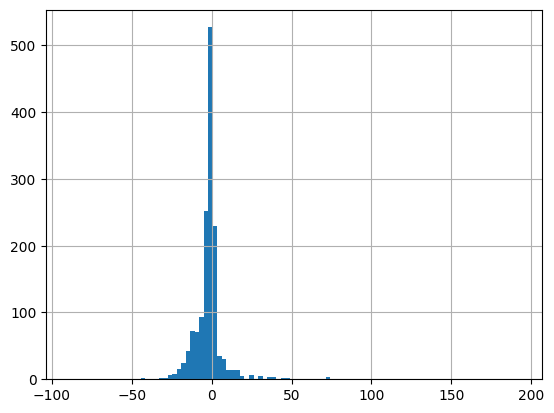

In [46]:
stacked_ipos_df['Price Increase'].hist(bins=100)

In [47]:
# Descriptive Analytics of a dataset
stacked_ipos_df.describe()

,IPO Date,IPO Price,Current,Return,Price Increase
count,1553,1539.000000,1513.000000,1485.000000,1499.000000
mean,2022-02-11 00:04:38.171281408,12.620065,11.469095,-0.127484,-1.150834
min,2021-01-05 00:00:00,2.500000,0.000000,-0.999500,-89.570000
25%,2021-03-25 00:00:00,10.000000,3.900000,-0.610000,-4.295000
50%,2021-10-01 00:00:00,10.000000,10.080000,-0.002000,-0.010000
75%,2022-07-29 00:00:00,14.000000,11.200000,0.084000,0.810000
max,2024-10-25 00:00:00,250.000000,302.500000,9.522100,192.810000
std,NaN,11.633934,18.023586,0.692690,13.351103


In [48]:
# some visualisation: bar chart using Plotly Express
import plotly.express as px

# Truncate to the first day in the month - for Bar names
stacked_ipos_df['Date_monthly'] = stacked_ipos_df['IPO Date'].dt.to_period('M').dt.to_timestamp()

# Count the number of deals for each month and year
monthly_deals = stacked_ipos_df['Date_monthly'].value_counts().reset_index().sort_values(by='Date_monthly')
monthly_deals.columns = ['Date_monthly', 'Number of Deals']

# Plotting the bar chart using Plotly Express
fig = px.bar(monthly_deals,
             x='Date_monthly',
             y='Number of Deals',
             labels={'Month_Year': 'Month and Year', 'Number of Deals': 'Number of Deals'},
             title='Number of IPO Deals per Month and Year',
             text='Number of Deals'
             )
fig.update_traces(textposition='outside',
                  textfont=dict(color='black',size=14), # Adjust the font size of the text
                  )
fig.update_layout(title_x=0.5) # Center the title

fig.show()

In [50]:
# To be used for home assignment: 'You can notice a bump in the price after the IPO? And after that the price goes down
# You're asked to design a simple strategy to buy and hold for X days (at 'Adj.Close' price, no fees)
# Find an optimal X between 1 and 30, that delivers you a MAX mean return on ALL 2023 IPOs?
# Write down the answer X (a number between 1 and 30)

# What is the distribution of other returns 25-50-75% quantiles? Compare mean and median returns for 2023 (median may be more robust),
  # are you losing money in 25% cases (if 25% quantile returns is < 0)
  # Try the same X for all deals in 2024.  How the mean return in 2024 (out of sample data) is different from 2023 data?

# REDDIT - recent IPO
# https://finance.yahoo.com/quote/RDDT/
reddit = yf.download(tickers = "RDDT",
                     period = "max",
                     interval = "1d")

reddit.tail()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,RDDT,RDDT,RDDT,RDDT,RDDT,RDDT
Date,,,,,,
2024-10-23 00:00:00+00:00,77.680000,77.680000,80.129997,76.651001,77.690002,4083700
2024-10-24 00:00:00+00:00,78.599998,78.599998,78.714996,77.139999,77.855003,2174100
2024-10-25 00:00:00+00:00,81.360001,81.360001,81.720001,79.019997,79.019997,3889100
2024-10-28 00:00:00+00:00,79.680000,79.680000,82.529999,79.449997,82.209999,6567500
2024-10-29 00:00:00+00:00,81.739998,81.739998,82.974998,79.099998,79.724998,12123900


<Axes: title={'center': "Reddit's (RDDT) price after the IPO"}, xlabel='Date'>

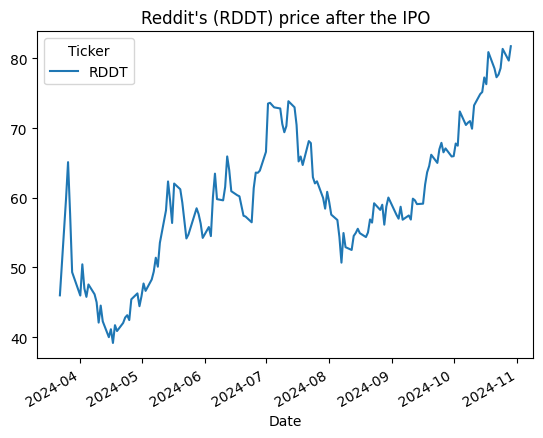

In [51]:
reddit['Adj Close'].plot.line(title='Reddit\'s (RDDT) price after the IPO')

#2) OHLCV data transformations

## 2.1 [Code Snippet 2] Time series for OHLCV

In [80]:
nvo_df = yf.download(tickers = "NVO",
                     period = "max",
                     interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [81]:
# big plus of an API's data: good typing from the box!
# notice DatetimeIndex - it is a recognised date
nvo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10967 entries, 1981-04-30 00:00:00+00:00 to 2024-10-29 00:00:00+00:00
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Adj Close, NVO)  10967 non-null  float64
 1   (Close, NVO)      10967 non-null  float64
 2   (High, NVO)       10967 non-null  float64
 3   (Low, NVO)        10967 non-null  float64
 4   (Open, NVO)       10967 non-null  float64
 5   (Volume, NVO)     10967 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 599.8 KB


In [82]:
nvo_df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVO,NVO,NVO,NVO,NVO,NVO
Date,,,,,,
2024-10-23 00:00:00+00:00,115.739998,115.739998,116.440002,114.949997,116.330002,3220700
2024-10-24 00:00:00+00:00,113.919998,113.919998,115.260002,113.910004,115.209999,4499900
2024-10-25 00:00:00+00:00,113.379997,113.379997,114.190002,113.099998,113.900002,4594600
2024-10-28 00:00:00+00:00,112.360001,112.360001,112.720001,111.669998,112.410004,5356000
2024-10-29 00:00:00+00:00,111.980003,111.980003,113.269997,111.150002,111.620003,8232600


In [83]:
# filter on date (index)
nvo_df_filtered_from_2020 = nvo_df[nvo_df.index>='2020-01-01']
nvo_df_filtered_from_2024 = nvo_df[nvo_df.index>='2024-01-01']

<Axes: title={'center': 'Novo Nordisk A/S (NVO) price daily'}, xlabel='Date'>

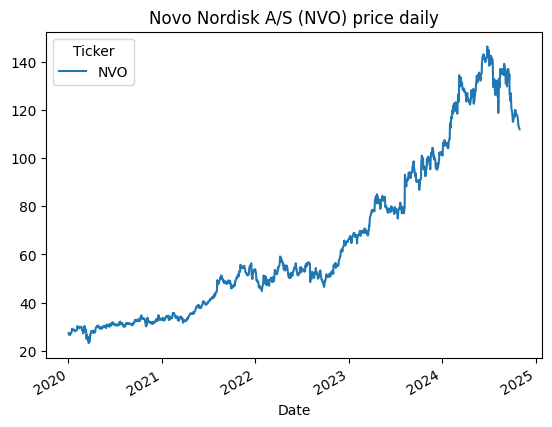

In [84]:
# Chaining: select one column, draw a plot, of a type line
nvo_df_filtered_from_2020['Adj Close'].plot.line(title='Novo Nordisk A/S (NVO) price daily')

In [85]:
# generating new fields (using DateTime features):

nvo_df['Ticker'] = 'NVO'
nvo_df['Year']= nvo_df.index.year
nvo_df['Month'] = nvo_df.index.month
nvo_df['Weekday'] = nvo_df.index.weekday
nvo_df['Date'] = nvo_df.index.date # to be used in joins

In [86]:
nvo_df.tail()

Price,Adj Close,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,Date
Ticker,NVO,NVO,NVO,NVO,NVO,NVO,,,,,
Date,,,,,,,,,,,
2024-10-23 00:00:00+00:00,115.739998,115.739998,116.440002,114.949997,116.330002,3220700,NVO,2024,10,2,2024-10-23
2024-10-24 00:00:00+00:00,113.919998,113.919998,115.260002,113.910004,115.209999,4499900,NVO,2024,10,3,2024-10-24
2024-10-25 00:00:00+00:00,113.379997,113.379997,114.190002,113.099998,113.900002,4594600,NVO,2024,10,4,2024-10-25
2024-10-28 00:00:00+00:00,112.360001,112.360001,112.720001,111.669998,112.410004,5356000,NVO,2024,10,0,2024-10-28
2024-10-29 00:00:00+00:00,111.980003,111.980003,113.269997,111.150002,111.620003,8232600,NVO,2024,10,1,2024-10-29


In [87]:
# shift ALL values (on x periods forward (+1) and backward (-1))
# equivalent of joining with a dataframe of the same vector, but with shifted date index
nvo_df['adj_close_minus_1'] = nvo_df['Adj Close'].shift(-1)
nvo_df['adj_close_plus_1'] = nvo_df['Adj Close'].shift(1)

nvo_df.tail()

Price,Adj Close,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,Date,adj_close_minus_1,adj_close_plus_1
Ticker,NVO,NVO,NVO,NVO,NVO,NVO,,,,,,,
Date,,,,,,,,,,,,,
2024-10-23 00:00:00+00:00,115.739998,115.739998,116.440002,114.949997,116.330002,3220700,NVO,2024,10,2,2024-10-23,113.919998,116.470001
2024-10-24 00:00:00+00:00,113.919998,113.919998,115.260002,113.910004,115.209999,4499900,NVO,2024,10,3,2024-10-24,113.379997,115.739998
2024-10-25 00:00:00+00:00,113.379997,113.379997,114.190002,113.099998,113.900002,4594600,NVO,2024,10,4,2024-10-25,112.360001,113.919998
2024-10-28 00:00:00+00:00,112.360001,112.360001,112.720001,111.669998,112.410004,5356000,NVO,2024,10,0,2024-10-28,111.980003,113.379997
2024-10-29 00:00:00+00:00,111.980003,111.980003,113.269997,111.150002,111.620003,8232600,NVO,2024,10,1,2024-10-29,NaN,112.360001


In [88]:
# historical growth
nvo_df['growth_1d'] = nvo_df['Adj Close'] / nvo_df['Adj Close'].shift(1)           # nvo_df['adj_close_plus_1']
nvo_df['growth_30d'] = nvo_df['Adj Close'] / nvo_df['Adj Close'].shift(30)

# FUTURE Growth : for regression models
nvo_df['growth_future_1d'] = nvo_df['Adj Close'].shift(-1) / nvo_df['Adj Close']   # nvo_df['adj_close_minus_1']

# FUTURE Growth: for binary models
nvo_df['is_positive_growth_1d_future'] = np.where(nvo_df['growth_future_1d'] > 1, 1, 0)

In [89]:
nvo_df

Price,Adj Close,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,Date,adj_close_minus_1,adj_close_plus_1,growth_1d,growth_30d,growth_future_1d,is_positive_growth_1d_future
Ticker,NVO,NVO,NVO,NVO,NVO,NVO,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,
1981-04-30 00:00:00+00:00,0.090006,0.160000,0.161250,0.160000,0.000000,16760000,NVO,1981,4,3,1981-04-30,0.092467,NaN,NaN,NaN,1.027344,1
1981-05-01 00:00:00+00:00,0.092467,0.164375,0.167500,0.164375,0.000000,15180000,NVO,1981,5,4,1981-05-01,0.090709,0.090006,1.027344,NaN,0.980989,0
1981-05-04 00:00:00+00:00,0.090709,0.161250,0.162500,0.161250,0.000000,3340000,NVO,1981,5,0,1981-05-04,0.090006,0.092467,0.980989,NaN,0.992248,0
1981-05-05 00:00:00+00:00,0.090006,0.160000,0.161875,0.160000,0.000000,12560000,NVO,1981,5,1,1981-05-05,0.092116,0.090709,0.992248,NaN,1.023438,1
1981-05-06 00:00:00+00:00,0.092116,0.163750,0.166250,0.163750,0.000000,15700000,NVO,1981,5,2,1981-05-06,0.092819,0.090006,1.023438,NaN,1.007634,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-23 00:00:00+00:00,115.739998,115.739998,116.440002,114.949997,116.330002,3220700,NVO,2024,10,2,2024-10-23,113.919998,116.470001,0.993732,0.855875,0.984275,0
2024-10-24 00:00:00+00:00,113.919998,113.919998,115.260002,113.910004,115.209999,4499900,NVO,2024,10,3,2024-10-24,113.379997,115.739998,0.984275,0.833602,0.995260,0


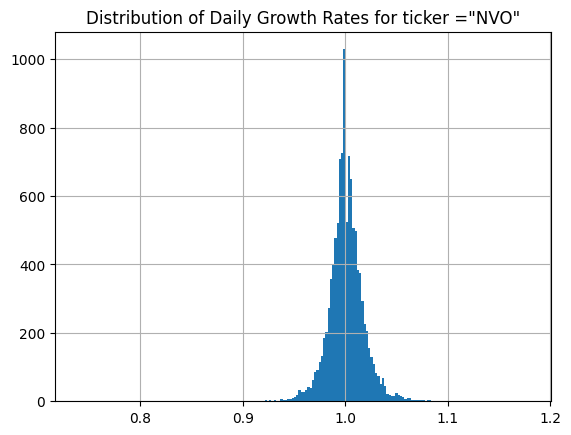

In [90]:
# normally the growth in 1 day is +-10%, while a lot of it is around 0% (around 1.)
plt.title('Distribution of Daily Growth Rates for ticker ="NVO"')
nvo_df.growth_1d.hist(bins=200)
plt.show()

<Axes: title={'center': 'Distribution of 2-days Growth Rates for ticker = "NVO"'}>

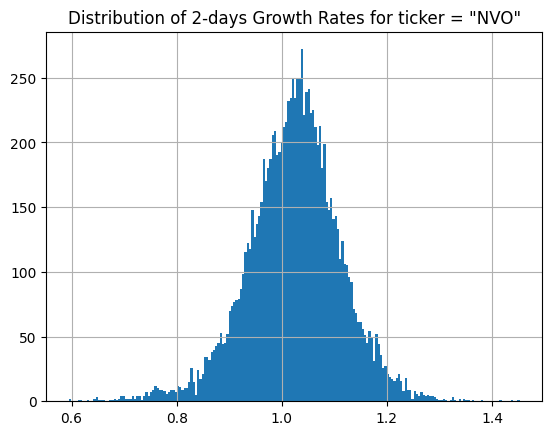

In [91]:
# you can see that the growth is can be much wider in 30 days (+- 30%)
plt.title('Distribution of 2-days Growth Rates for ticker = "NVO"')

nvo_df.growth_30d.hist(bins=200)

In [92]:
# for modeling: we use growth_1d, growth_2d as feature
COLUMNS = [k for k in nvo_df.keys() if k.find('growth')>=0 or k=='Adj Close']
nvo_df[COLUMNS].tail()

AttributeError: 'tuple' object has no attribute 'find'

In [93]:
# Calculate the distribution if future growth
nvo_df.is_positive_growth_1d_future.value_counts() / len(nvo_df)

,count
is_positive_growth_1d_future,
0,0.512538
1,0.487462


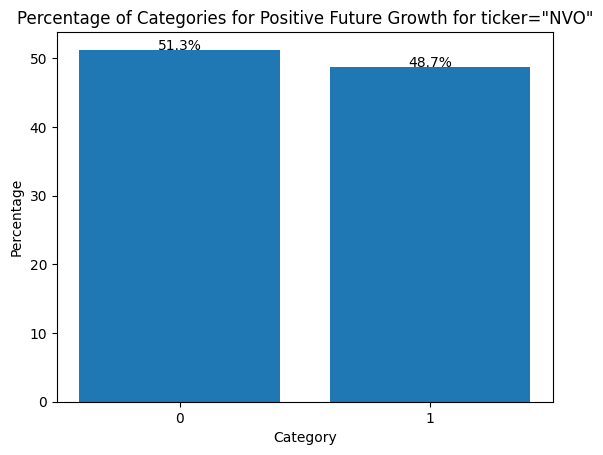

In [94]:
# Calculate value counts
value_counts = nvo_df['is_positive_growth_1d_future'].value_counts()

# Calculate percentage of each category
percentage = (value_counts / len(nvo_df)) * 100

# Plot as a bar chart
plt.bar(percentage.index.astype(str), percentage)
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Percentage of Categories for Positive Future Growth for ticker="NVO"')

# Add percentage values on top of each bar
for i, value in enumerate(percentage):
    plt.text(i, value + 0, f'{value:.1f}%', ha='center')

plt.show()

## 2.2) [Code Snippet 6] Candlestick chart for OHLCV

In [96]:
# Candlestick charts : https://plotly.com/python/candlestick-charts/
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=nvo_df_filtered_from_2020.index,
                open=nvo_df_filtered_from_2020.Open,
                high=nvo_df_filtered_from_2020.High,
                low=nvo_df_filtered_from_2020.Low,
                close=nvo_df_filtered_from_2020.Close)
               ])

fig.update_layout(
    title="NVO's daily candlestick chart from 2020",
    title_x=0.5,  # Set title x-position to center
    xaxis_rangeslider_visible=True
    )

fig.show()

# 3) Macro Indicators

## 3.0) Previous indicators from module 1

In [97]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 10; day=30
Period for indexes: 1954-10-30 to 2024-10-30 


In [98]:
# reuse code for ealier covered indicators
dax_daily = yf.download(tickers = "^GDAXI",
                     period = "max",
                     interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [99]:
for i in [1,3,7,30,90,365]:
  #DEBUG: dax_daily['Adj Close_sh_m_'+str(i)+'d'] = dax_daily['Adj Close'].shift(i)
  dax_daily['growth_dax_'+str(i)+'d'] = dax_daily['Adj Close'] / dax_daily['Adj Close'].shift(i)

In [104]:
dax_daily.head()

Price,Adj Close,Close,High,Low,Open,Volume,growth_dax_1d,growth_dax_3d,growth_dax_7d,growth_dax_30d,growth_dax_90d,growth_dax_365d
Ticker,^GDAXI,^GDAXI,^GDAXI,^GDAXI,^GDAXI,^GDAXI,,,,,,
Date,,,,,,,,,,,,
1987-12-30 00:00:00+00:00,1005.190002,1005.190002,1005.190002,1005.190002,1005.190002,0,NaN,NaN,NaN,NaN,NaN,NaN
1988-01-04 00:00:00+00:00,956.489990,956.489990,956.489990,956.489990,956.489990,0,0.951551,NaN,NaN,NaN,NaN,NaN
1988-01-05 00:00:00+00:00,996.099976,996.099976,996.099976,996.099976,996.099976,0,1.041412,NaN,NaN,NaN,NaN,NaN
1988-01-06 00:00:00+00:00,1006.010010,1006.010010,1006.010010,1006.010010,1006.010010,0,1.009949,1.000816,NaN,NaN,NaN,NaN
1988-01-07 00:00:00+00:00,1014.469971,1014.469971,1014.469971,1014.469971,1014.469971,0,1.008409,1.060617,NaN,NaN,NaN,NaN


In [101]:
dax_daily.tail(2)

Price,Adj Close,Close,High,Low,Open,Volume,growth_dax_1d,growth_dax_3d,growth_dax_7d,growth_dax_30d,growth_dax_90d,growth_dax_365d
Ticker,^GDAXI,^GDAXI,^GDAXI,^GDAXI,^GDAXI,^GDAXI,,,,,,
Date,,,,,,,,,,,,
2024-10-29 00:00:00+00:00,19478.070312,19478.070312,19643.119141,19465.000000,19634.330078,46982400,0.997258,1.001804,0.990879,1.040157,1.071541,1.220987
2024-10-30 00:00:00+00:00,19412.369141,19412.369141,19420.939453,19378.640625,19403.429688,0,0.996627,0.997368,0.997491,1.037457,1.069243,1.220220


In [115]:
GROWTH_KEYS = [k for k in dax_daily.keys() if k[0].startswith('growth')]
dax_daily_to_merge = dax_daily[GROWTH_KEYS]
dax_daily_to_merge.tail(1)

Price,growth_dax_1d,growth_dax_3d,growth_dax_7d,growth_dax_30d,growth_dax_90d,growth_dax_365d
Ticker,,,,,,
Date,,,,,,
2024-10-30 00:00:00+00:00,0.996627,0.997368,0.997491,1.037457,1.069243,1.22022


In [117]:
def get_growth_df(df:pd.DataFrame, prefix:str)->pd.DataFrame:
  for i in [1,3,7,30,90,365]:
    df['growth_'+prefix+'_'+str(i)+'d'] = df['Adj Close'] / df['Adj Close'].shift(i)
    GROWTH_KEYS = [k for k in df.keys() if k[0].startswith('growth')]
  return df[GROWTH_KEYS]

In [118]:
# https://finance.yahoo.com/quote/%5EGSPC/
# SNP - SNP Real Time Price. Currency in USD
snp500_daily = yf.download(tickers = "^GSPC",
                     period = "max",
                     interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [119]:
snp500_to_merge = get_growth_df(snp500_daily,'snp500')
snp500_to_merge.tail(2)

Price,growth_snp500_1d,growth_snp500_3d,growth_snp500_7d,growth_snp500_30d,growth_snp500_90d,growth_snp500_365d
Ticker,,,,,,
Date,,,,,,
2024-10-28 00:00:00+00:00,1.002651,1.004502,0.996927,1.033806,1.064012,1.416949
2024-10-29 00:00:00+00:00,1.001614,1.003969,0.994586,1.035200,1.067397,1.402559


In [120]:
# Dow Jones Industrial Average: https://finance.yahoo.com/quote/%5EDJI?.tsrc=fin-srch
dji_daily = yf.download(tickers = "^DJI",
                     period = "max",
                     interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [121]:
dji_daily_to_merge = get_growth_df(dji_daily,'dji')
dji_daily_to_merge.tail(2)

Price,growth_dji_1d,growth_dji_3d,growth_dji_7d,growth_dji_30d,growth_dji_90d,growth_dji_365d
Ticker,,,,,,
Date,,,,,,
2024-10-28 00:00:00+00:00,1.006486,0.997004,0.980308,1.018391,1.083118,1.283999
2024-10-29 00:00:00+00:00,0.996355,0.996665,0.975902,1.015067,1.078741,1.263677


In [122]:
# ETFs
# WisdomTree India Earnings Fund (EPI)
# NYSEArca - Nasdaq Real Time Price. Currency in USD
# WEB: https://finance.yahoo.com/quote/EPI/history?p=EPI
epi_etf_daily = yf.download(tickers = "EPI",
                     period = "max",
                     interval = "1d")
epi_etf_daily.tail(2)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,EPI,EPI,EPI,EPI,EPI,EPI
Date,,,,,,
2024-10-28 00:00:00+00:00,47.279999,47.279999,47.360001,47.110001,47.16,967100
2024-10-29 00:00:00+00:00,47.470001,47.470001,47.549999,47.400002,47.50,2420900


In [123]:
epi_etf_daily_to_merge = get_growth_df(epi_etf_daily,'epi')
epi_etf_daily_to_merge.tail(2)

Price,growth_epi_1d,growth_epi_3d,growth_epi_7d,growth_epi_30d,growth_epi_90d,growth_epi_365d
Ticker,,,,,,
Date,,,,,,
2024-10-28 00:00:00+00:00,1.009825,0.994531,0.973440,0.945600,0.990779,1.434824
2024-10-29 00:00:00+00:00,1.004019,0.997898,0.974543,0.951875,0.998948,1.442775


In [124]:
# Real Potential Gross Domestic Product (GDPPOT), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPPOT
gdppot = pdr.DataReader("GDPPOT", "fred", start=start)
gdppot['gdppot_us_yoy'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot['gdppot_us_qoq'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(1)-1
gdppot.tail(2)

,GDPPOT,gdppot_us_yoy,gdppot_us_qoq
DATE,,,
2024-07-01,22800.63,0.020675,0.005201
2024-10-01,22920.27,0.020854,0.005247


In [125]:
gdppot_to_merge = gdppot[['gdppot_us_yoy','gdppot_us_qoq']]
gdppot_to_merge.tail(1)

,gdppot_us_yoy,gdppot_us_qoq
DATE,,
2024-10-01,0.020854,0.005247


In [126]:
# # "Core CPI index", MONTHLY
# https://fred.stlouisfed.org/series/CPILFESL
# The "Consumer Price Index for All Urban Consumers: All Items Less Food & Energy"
# is an aggregate of prices paid by urban consumers for a typical basket of goods, excluding food and energy.
# This measurement, known as "Core CPI," is widely used by economists because food and energy have very volatile prices.
cpilfesl = pdr.DataReader("CPILFESL", "fred", start=start)
cpilfesl['cpi_core_yoy'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(12)-1
cpilfesl['cpi_core_mom'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(1)-1

cpilfesl.tail(2)

,CPILFESL,cpi_core_yoy,cpi_core_mom
DATE,,,
2024-08-01,319.768,0.032656,0.002810
2024-09-01,320.767,0.032587,0.003124


In [127]:
cpilfesl_to_merge = cpilfesl[['cpi_core_yoy','cpi_core_mom']]
cpilfesl_to_merge.tail(2)

,cpi_core_yoy,cpi_core_mom
DATE,,
2024-08-01,0.032656,0.002810
2024-09-01,0.032587,0.003124


In [128]:
# Fed rate https://fred.stlouisfed.org/series/FEDFUNDS
fedfunds = pdr.DataReader("FEDFUNDS", "fred", start=start)
fedfunds.tail(2)

,FEDFUNDS
DATE,
2024-08-01,5.33
2024-09-01,5.13


In [129]:
# https://fred.stlouisfed.org/series/DGS1
dgs1 = pdr.DataReader("DGS1", "fred", start=start)
dgs1.tail(2)

,DGS1
DATE,
2024-10-25,4.29
2024-10-28,4.28


In [130]:
# https://fred.stlouisfed.org/series/DGS5
dgs5 = pdr.DataReader("DGS5", "fred", start=start)
dgs5.tail(2)

,DGS5
DATE,
2024-10-25,4.07
2024-10-28,4.11


In [131]:
# https://fred.stlouisfed.org/series/DGS10
dgs10 = pdr.DataReader("DGS10", "fred", start=start)
dgs10.tail(2)

,DGS10
DATE,
2024-10-25,4.25
2024-10-28,4.28


## 3.1) [Code snippet 3] VIX - Volatility Index

In [154]:
# VIX - Volatility Index
# https://finance.yahoo.com/quote/%5EVIX/
vix = yf.download(tickers = "^VIX",
                     period = "max",
                     interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [155]:
vix.tail(2)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^VIX,^VIX,^VIX,^VIX,^VIX,^VIX
Date,,,,,,
2024-10-29 00:00:00+00:00,19.34,19.34,20.530001,19.059999,19.75,0
2024-10-30 00:00:00+00:00,19.40,19.40,19.490000,19.299999,0.00,0


In [156]:
ohlcv_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
vix = vix[ohlcv_columns]

vix.columns = vix.columns.get_level_values(0)

vix.index.name = 'Date'
vix

Price,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1990-01-02 00:00:00+00:00,17.240000,17.240000,17.240000,17.240000,0,17.240000
1990-01-03 00:00:00+00:00,18.190001,18.190001,18.190001,18.190001,0,18.190001
1990-01-04 00:00:00+00:00,19.219999,19.219999,19.219999,19.219999,0,19.219999
1990-01-05 00:00:00+00:00,20.110001,20.110001,20.110001,20.110001,0,20.110001
1990-01-08 00:00:00+00:00,20.260000,20.260000,20.260000,20.260000,0,20.260000
...,...,...,...,...,...,...
2024-10-24 00:00:00+00:00,18.870001,20.240000,18.629999,19.080000,0,19.080000
2024-10-25 00:00:00+00:00,19.219999,20.510000,18.230000,20.330000,0,20.330000
2024-10-28 00:00:00+00:00,19.110001,19.879999,18.910000,19.799999,0,19.799999


In [157]:
vix_to_merge = vix['Adj Close']
vix_to_merge.tail()

,Adj Close
Date,
2024-10-24 00:00:00+00:00,19.080000
2024-10-25 00:00:00+00:00,20.330000
2024-10-28 00:00:00+00:00,19.799999
2024-10-29 00:00:00+00:00,19.340000
2024-10-30 00:00:00+00:00,19.400000


<Axes: title={'center': 'VIX value over time'}, xlabel='Date'>

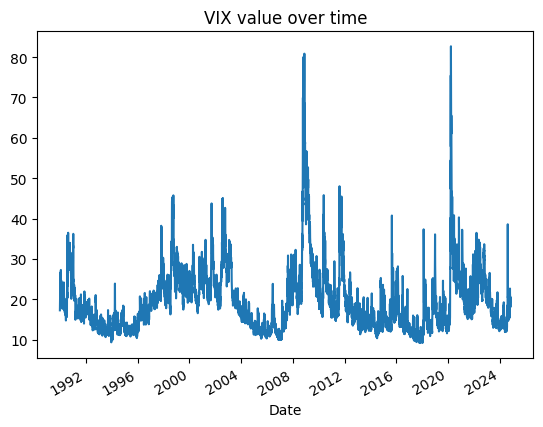

In [158]:
# Static graphs: hard to zoom in and get the exact dates of spikes
vix['Adj Close'].plot.line(title = "VIX value over time")

In [159]:
vix

Price,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1990-01-02 00:00:00+00:00,17.240000,17.240000,17.240000,17.240000,0,17.240000
1990-01-03 00:00:00+00:00,18.190001,18.190001,18.190001,18.190001,0,18.190001
1990-01-04 00:00:00+00:00,19.219999,19.219999,19.219999,19.219999,0,19.219999
1990-01-05 00:00:00+00:00,20.110001,20.110001,20.110001,20.110001,0,20.110001
1990-01-08 00:00:00+00:00,20.260000,20.260000,20.260000,20.260000,0,20.260000
...,...,...,...,...,...,...
2024-10-24 00:00:00+00:00,18.870001,20.240000,18.629999,19.080000,0,19.080000
2024-10-25 00:00:00+00:00,19.219999,20.510000,18.230000,20.330000,0,20.330000
2024-10-28 00:00:00+00:00,19.110001,19.879999,18.910000,19.799999,0,19.799999


In [160]:
# Dynamic visualisation of VIX prices
fig = px.line(vix,
              x=vix.index,
              y="Adj Close",
              title='VIX over time')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()

## 3.2) Gold - other assets

In [165]:
# GOLD
# WEB: https://finance.yahoo.com/quote/GC%3DF
gold = yf.download(tickers = "GC=F",
                     period = "max",
                     interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [166]:
gold.columns = gold.columns.get_level_values(0)


gold.tail(1)

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-10-30 00:00:00+00:00,2792.699951,2792.699951,2801.699951,2785.0,2786.899902,48708


In [167]:
gold_to_merge = get_growth_df(gold,'gold')
gold_to_merge.tail(2)

Price
Date
2024-10-29 00:00:00+00:00
2024-10-30 00:00:00+00:00


In [168]:
# Dynamic visualisation of GOLD prices
fig = px.line(gold,
              x=gold.index,
              y="Adj Close",
              title='GOLD over time')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()

## 3.3) WTI Crude and Brent Oil

In [177]:
# WTI Crude Oil
# WEB: https://uk.finance.yahoo.com/quote/CL=F/
crude_oil = yf.download(tickers = "CL=F",
                     period = "max",
                     interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [178]:

crude_oil.tail(2)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,CL=F,CL=F,CL=F,CL=F,CL=F,CL=F
Date,,,,,,
2024-10-29 00:00:00+00:00,67.209999,67.209999,68.519997,66.720001,68.019997,419623
2024-10-30 00:00:00+00:00,67.680000,67.680000,68.199997,67.279999,67.470001,36045


In [179]:
crude_oil_to_merge = get_growth_df(crude_oil,'wti_oil')
crude_oil_to_merge.tail(2)

Price,growth_wti_oil_1d,growth_wti_oil_3d,growth_wti_oil_7d,growth_wti_oil_30d,growth_wti_oil_90d,growth_wti_oil_365d
Ticker,,,,,,
Date,,,,,,
2024-10-29 00:00:00+00:00,0.997477,0.957544,0.970962,0.944093,0.832528,0.922834
2024-10-30 00:00:00+00:00,1.006993,0.942881,0.959184,0.954449,0.829107,0.941831


In [180]:
crude_oil.columns = crude_oil.columns.get_level_values(0)

In [181]:
# Dynamic visualisation
fig = px.line(crude_oil,
              x=crude_oil.index,
              y="Adj Close",
              title='WTI Crude Oil over time')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()

In [186]:
# Brent Oil
# WEB: https://uk.finance.yahoo.com/quote/BZ=F/
brent_oil = yf.download(tickers = "BZ=F",
                     period = "max",
                     interval = "1d")

brent_oil.tail(2)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BZ=F,BZ=F,BZ=F,BZ=F,BZ=F,BZ=F
Date,,,,,,
2024-10-29 00:00:00+00:00,71.120003,71.120003,72.57,70.730003,72.110001,28003
2024-10-30 00:00:00+00:00,71.199997,71.199997,71.68,70.790001,71.000000,3856


In [187]:
brent_oil_to_merge = get_growth_df(brent_oil,'brent_oil')
brent_oil_to_merge.tail(2)

Price,growth_brent_oil_1d,growth_brent_oil_3d,growth_brent_oil_7d,growth_brent_oil_30d,growth_brent_oil_90d,growth_brent_oil_365d
Ticker,,,,,,
Date,,,,,,
2024-10-29 00:00:00+00:00,0.995800,0.956171,0.973447,0.964993,0.834350,0.937517
2024-10-30 00:00:00+00:00,1.001125,0.936226,0.958406,0.966734,0.827811,0.942048


In [188]:
brent_oil.columns = brent_oil.columns.get_level_values(0)


In [189]:
# Dynamic visualisation
fig = px.line(brent_oil,
              x=brent_oil.index,
              y="Adj Close",
              title='Brent Oil over time')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()


## 3.4) Bitcoin prices: BTC_USD

In [191]:
# https://finance.yahoo.com/quote/BTC-USD/
btc_usd =  yf.download(tickers = "BTC-USD",
                     period = "max",
                     interval = "1d")

btc_usd.tail(2)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2024-10-29 00:00:00+00:00,72720.492188,72720.492188,73577.210938,69729.914062,69910.046875,58541874402
2024-10-30 00:00:00+00:00,72493.804688,72493.804688,72707.632812,72062.281250,72707.632812,52563304448


In [192]:
btc_usd_to_merge = get_growth_df(btc_usd,'btc_usd')
btc_usd_to_merge.tail(2)

Price,growth_btc_usd_1d,growth_btc_usd_3d,growth_btc_usd_7d,growth_btc_usd_30d,growth_btc_usd_90d,growth_btc_usd_365d
Ticker,,,,,,
Date,,,,,,
2024-10-29 00:00:00+00:00,1.040235,1.085142,1.079557,1.107948,1.125369,2.107696
2024-10-30 00:00:00+00:00,0.996883,1.067195,1.091245,1.144708,1.109189,2.091100


In [193]:
btc_usd.columns = btc_usd.columns.get_level_values(0)

In [194]:
# Dynamic visualisation
fig = px.line(btc_usd,
              x=btc_usd.index,
              y="Adj Close",
              title='Bitcoin price daily')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()


## 3.5 [Code snippet 4] Eurostat: "The home of high-quality statistics and data on Europe"


In [195]:
!pip install eurostat

# https://pypi.org/project/eurostat/
# https://ec.europa.eu/eurostat/web/main/data/database

In [196]:
import eurostat

In [197]:
# LONG WAIT TIME ~15 min, unless you filter data

# https://ec.europa.eu/eurostat/cache/metadata/en/irt_euryld_esms.htm
  # Euro yield curves (irt_euryld)
  # Reference Metadata in Euro SDMX Metadata Structure (ESMS)
  # Compiling agency: Eurostat, the statistical office of the European Uni

# the service is slow, you need to specify addtional params : https://pypi.org/project/eurostat/0.2.3/

filter_pars = {'startPeriod':'2024-04-01', 'endPeriod':'2024-05-01'}

code = 'irt_euryld_d'
eurostat_euro_yield_df = eurostat.get_data_df(code, flags=True, filter_pars=filter_pars,  verbose=True)

Download progress: 100.0%



In [198]:
eurostat_euro_yield_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   freq              2148 non-null   object 
 1   yld_curv          2148 non-null   object 
 2   maturity          2148 non-null   object 
 3   bonds             2148 non-null   object 
 4   geo\TIME_PERIOD   2148 non-null   object 
 5   2024-04-02_value  2148 non-null   float64
 6   2024-04-02_flag   2148 non-null   object 
 7   2024-04-03_value  2148 non-null   float64
 8   2024-04-03_flag   2148 non-null   object 
 9   2024-04-04_value  2148 non-null   float64
 10  2024-04-04_flag   2148 non-null   object 
 11  2024-04-05_value  2148 non-null   float64
 12  2024-04-05_flag   2148 non-null   object 
 13  2024-04-08_value  2148 non-null   float64
 14  2024-04-08_flag   2148 non-null   object 
 15  2024-04-09_value  2148 non-null   float64
 16  2024-04-09_flag   2148 non-null   object 


In [199]:
eurostat_euro_yield_df.head()

,freq,yld_curv,maturity,bonds,geo\TIME_PERIOD,2024-04-02_value,2024-04-02_flag,2024-04-03_value,2024-04-03_flag,2024-04-04_value,...,2024-04-23_value,2024-04-23_flag,2024-04-24_value,2024-04-24_flag,2024-04-25_value,2024-04-25_flag,2024-04-26_value,2024-04-26_flag,2024-04-29_value,2024-04-29_flag
0,D,INS_FWD,M10,CGB_EA,EA,2.93540,,2.97183,,2.92502,...,3.02264,,3.08430,,3.13182,,3.08867,,3.06128,
1,D,INS_FWD,M10,CGB_EA_AAA,EA,2.84475,,2.86360,,2.83422,...,2.91176,,2.96612,,3.01979,,2.98661,,2.95786,
2,D,INS_FWD,M11,CGB_EA,EA,2.87170,,2.90848,,2.85814,...,2.96704,,3.03342,,3.08275,,3.03647,,3.00758,
3,D,INS_FWD,M11,CGB_EA_AAA,EA,2.76744,,2.78547,,2.75286,...,2.84353,,2.90169,,2.95777,,2.92274,,2.89261,
4,D,INS_FWD,M3,CGB_EA,EA,3.61646,,3.63975,,3.62033,...,3.59855,,3.61313,,3.64745,,3.63097,,3.61332,


In [200]:
eurostat_euro_yield_df['bonds'].value_counts()

,count
bonds,
CGB_EA,1074
CGB_EA_AAA,1074


In [201]:
eurostat_euro_yield_df['maturity'].value_counts()


,count
maturity,
M10,6
Y26_M8,6
Y28_M4,6
Y28_M3,6
Y28_M2,6
...,...
Y18_M9,6
Y18_M8,6
Y18_M7,6


In [202]:
eurostat_euro_yield_df['yld_curv'].value_counts()

,count
yld_curv,
INS_FWD,716
PAR,716
SPOT_RT,716


In [203]:
eurostat_euro_yield_df

,freq,yld_curv,maturity,bonds,geo\TIME_PERIOD,2024-04-02_value,2024-04-02_flag,2024-04-03_value,2024-04-03_flag,2024-04-04_value,...,2024-04-23_value,2024-04-23_flag,2024-04-24_value,2024-04-24_flag,2024-04-25_value,2024-04-25_flag,2024-04-26_value,2024-04-26_flag,2024-04-29_value,2024-04-29_flag
0,D,INS_FWD,M10,CGB_EA,EA,2.93540,,2.97183,,2.92502,...,3.02264,,3.08430,,3.13182,,3.08867,,3.06128,
1,D,INS_FWD,M10,CGB_EA_AAA,EA,2.84475,,2.86360,,2.83422,...,2.91176,,2.96612,,3.01979,,2.98661,,2.95786,
2,D,INS_FWD,M11,CGB_EA,EA,2.87170,,2.90848,,2.85814,...,2.96704,,3.03342,,3.08275,,3.03647,,3.00758,
3,D,INS_FWD,M11,CGB_EA_AAA,EA,2.76744,,2.78547,,2.75286,...,2.84353,,2.90169,,2.95777,,2.92274,,2.89261,
4,D,INS_FWD,M3,CGB_EA,EA,3.61646,,3.63975,,3.62033,...,3.59855,,3.61313,,3.64745,,3.63097,,3.61332,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,D,SPOT_RT,Y9_M7,CGB_EA_AAA,EA,2.46991,,2.46791,,2.39559,...,2.54635,,2.62834,,2.68168,,2.60908,,2.57881,
2144,D,SPOT_RT,Y9_M8,CGB_EA,EA,3.05403,,3.06662,,2.97186,...,3.07345,,3.16620,,3.23291,,3.14712,,3.10632,
2145,D,SPOT_RT,Y9_M8,CGB_EA_AAA,EA,2.47321,,2.47116,,2.39873,...,2.54935,,2.63147,,2.68473,,2.61196,,2.58177,
2146,D,SPOT_RT,Y9_M9,CGB_EA,EA,3.05847,,3.07104,,2.97618,...,3.07734,,3.17017,,3.23687,,3.15093,,3.11021,


In [204]:
# Visual graph: https://www.ecb.europa.eu/stats/financial_markets_and_interest_rates/euro_area_yield_curves/html/index.en.html
FILTER = (eurostat_euro_yield_df.yld_curv=='SPOT_RT')& (eurostat_euro_yield_df.bonds=='CGB_EA_AAA')
filtered_eurostat_euro_yield_df = eurostat_euro_yield_df[FILTER]

In [205]:
filtered_eurostat_euro_yield_df.sort_values(by='maturity')[['maturity','2024-04-18_value']].head(20)

,maturity,2024-04-18_value
1433,M10,3.36335
1435,M11,3.31940
1437,M3,3.72264
1439,M4,3.66536
1441,M5,3.61017
1443,M6,3.55700
1445,M7,3.50580
1447,M8,3.45649
1449,M9,3.40903
1451,Y1,3.27711


In [206]:
import re

def extract_numbers(input_string):
    y_match = re.search(r'Y(\d+)', input_string)
    m_match = re.search(r'M(\d+)', input_string)

    y_number = int(y_match.group(1)) if y_match else 0
    m_number = int(m_match.group(1)) if m_match else 0


    return y_number*12 + m_number

# Examples
examples = ["Y10_M2", "M3", "Y1"]
for example in examples:
    res = extract_numbers(example)
    print(f"{example} ==> {res}")

Y10_M2 ==> 122
M3 ==> 3
Y1 ==> 12


In [207]:
# define new field: "maturity in months"
filtered_eurostat_euro_yield_df['maturity_in_months'] = filtered_eurostat_euro_yield_df.maturity.apply(lambda x:extract_numbers(x))

<ipython-input-207-ffa8baf09650>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [208]:
filtered_eurostat_euro_yield_df.sort_values(by='maturity_in_months')[['maturity','maturity_in_months','2024-04-18_value']].head(20)

,maturity,maturity_in_months,2024-04-18_value
1437,M3,3,3.72264
1439,M4,4,3.66536
1441,M5,5,3.61017
1443,M6,6,3.55700
1445,M7,7,3.50580
1447,M8,8,3.45649
1449,M9,9,3.40903
1433,M10,10,3.36335
1435,M11,11,3.31940
1451,Y1,12,3.27711


In [209]:
filtered_eurostat_euro_yield_df.loc[:,'maturity_in_years'] = filtered_eurostat_euro_yield_df.maturity_in_months/12.0

<ipython-input-209-c3c6c300f9f8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: title={'center': 'AAA rated bonds spot yield curve'}, xlabel='maturity_in_years'>

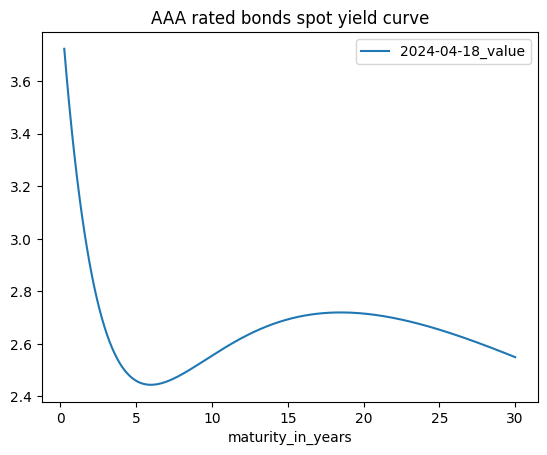

In [210]:
# exactly the same as on the Web:  https://www.ecb.europa.eu/stats/financial_markets_and_interest_rates/euro_area_yield_curves/html/index.en.html
filtered_eurostat_euro_yield_df \
  .sort_values(by='maturity_in_months')[['maturity_in_years','2024-04-18_value']] \
  .plot.line(x='maturity_in_years',
            y='2024-04-18_value',
            title='AAA rated bonds spot yield curve')

# 4) [Code Snippet 5] Fundamental indicators

* Read about "Ratio Analysis" to learn about more ratios: https://www.investopedia.com/terms/r/ratioanalysis.asp
* https://algotrading101.com/learn/yahoo-finance-api-guide/

In [211]:
# let's select some set of stocks: e.g. top US companies on 'Employees':
# https://companiesmarketcap.com/usa/largest-american-companies-by-number-of-employees/

US_TOP_EMPLOYEES_STOCKS = ['WMT','AMZN','UPS','HD','CNXC','TGT','KR','UNH','BRK-B','SBUX']

# WMT
ticker = US_TOP_EMPLOYEES_STOCKS[0]

# WMT ticker
one_company = yf.Ticker(ticker)

In [212]:
# Fundamental info appears close earning dates, you need to download it and use quickly (before/after trading day),
#  unless you're a fundamental long-term investor looking for a several months-quarters-years strategy (period between buy and sell)
# This dfthis is the easiest thing to join with the main dataset and get "some" technical indicators present
eps_earnings = one_company.earnings_dates
eps_earnings['Ticker'] = ticker
eps_earnings

,EPS Estimate,Reported EPS,Surprise(%),Ticker
Earnings Date,,,,
2025-08-13 09:00:00-04:00,NaN,NaN,NaN,WMT
2025-05-14 07:00:00-04:00,NaN,NaN,NaN,WMT
2025-02-20 09:00:00-05:00,NaN,NaN,NaN,WMT
2024-11-19 09:00:00-05:00,0.53,NaN,NaN,WMT
2024-08-15 07:00:00-04:00,0.65,0.67,0.0378,WMT
2024-05-16 07:00:00-04:00,0.52,0.60,0.1460,WMT
2024-02-20 07:00:00-05:00,0.55,0.60,0.0941,WMT
2023-11-16 07:00:00-05:00,1.52,1.53,0.0038,WMT
2023-08-17 07:00:00-04:00,1.71,1.84,0.0791,WMT


In [213]:
one_company.calendar

{'Dividend Date': datetime.date(2025, 1, 6),
 'Ex-Dividend Date': datetime.date(2024, 12, 12),
 'Earnings Date': [datetime.date(2024, 11, 19)],
 'Earnings High': 0.56,
 'Earnings Low': 0.51,
 'Earnings Average': 0.53,
 'Revenue High': 169456000000,
 'Revenue Low': 165973000000,
 'Revenue Average': 167532000000}

In [214]:
one_company.financials

,2024-01-31,2023-01-31,2022-01-31,2021-01-31
Tax Effect Of Unusual Items,0.0,0.0,-612140000.0,0.0
Tax Rate For Calcs,0.255,0.336,0.254,0.333
Normalized EBITDA,36384000000.0,30089000000.0,33758000000.0,34031000000.0
Total Unusual Items,0.0,0.0,-2410000000.0,0.0
Total Unusual Items Excluding Goodwill,0.0,0.0,-2410000000.0,0.0
Net Income From Continuing Operation Net Minority Interest,15511000000.0,11680000000.0,13673000000.0,13510000000.0
Reconciled Depreciation,11853000000.0,10945000000.0,10658000000.0,11152000000.0
Reconciled Cost Of Revenue,490142000000.0,463721000000.0,429000000000.0,420315000000.0
EBITDA,36384000000.0,30089000000.0,31348000000.0,34031000000.0
EBIT,24531000000.0,19144000000.0,20690000000.0,22879000000.0


In [215]:
EPS = one_company.financials.loc['Basic EPS']
EPS

,Basic EPS
2024-01-31,1.92
2023-01-31,1.43
2022-01-31,1.633333
2021-01-31,1.59


In [216]:
# or should we use NORMALIZED_EBITDA?
EBITDA = one_company.financials.loc['EBITDA']
EBITDA_margin = one_company.financials.loc['EBITDA'] /  one_company.financials.loc['Total Revenue']

In [217]:
EBITDA_margin

,0
2024-01-31,0.056137
2023-01-31,0.049222
2022-01-31,0.054732
2021-01-31,0.060862


In [218]:
NET_INCOME = one_company.financials.loc['Net Income']
NET_INCOME_margin = one_company.financials.loc['Net Income'] /  one_company.financials.loc['Total Revenue']

In [219]:
NET_INCOME

,Net Income
2024-01-31,15511000000.0
2023-01-31,11680000000.0
2022-01-31,13673000000.0
2021-01-31,13510000000.0


In [220]:
# Compare with Public information - you can fully replicate the numbers (yearly and/or quarterly):
# https://www.wsj.com/market-data/quotes/WMT/financials/annual/income-statement
NET_INCOME_margin

,0
2024-01-31,0.023932
2023-01-31,0.019107
2022-01-31,0.023872
2021-01-31,0.024162


In [221]:
# Combine the series into a DataFrame
df_fin_ratios = pd.DataFrame({
    'NET_INCOME_margin': 100.0 * NET_INCOME_margin, #for visualisation -- Margin in %
    'EBITDA_margin': 100.0 *EBITDA_margin, #for visualisation -- Margin in %
    'EPS': EPS
})

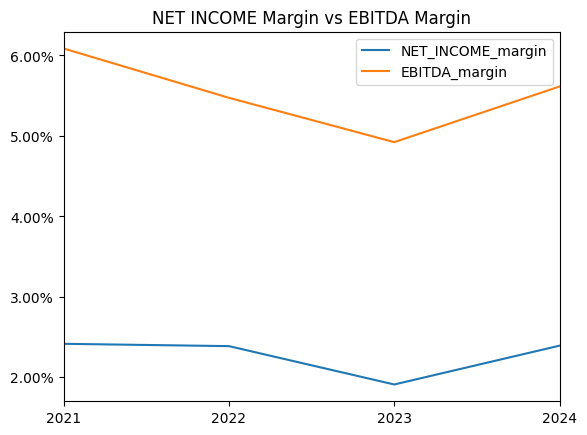

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Assuming df_fin_ratios is your DataFrame containing the financial ratios
# Make sure you have already created this DataFrame

# Plotting the specified columns
ax = df_fin_ratios[['NET_INCOME_margin','EBITDA_margin']].plot.line()

# Setting the y-axis formatter to display values as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Adding title
plt.title('NET INCOME Margin vs EBITDA Margin')

# Displaying the plot
plt.show()

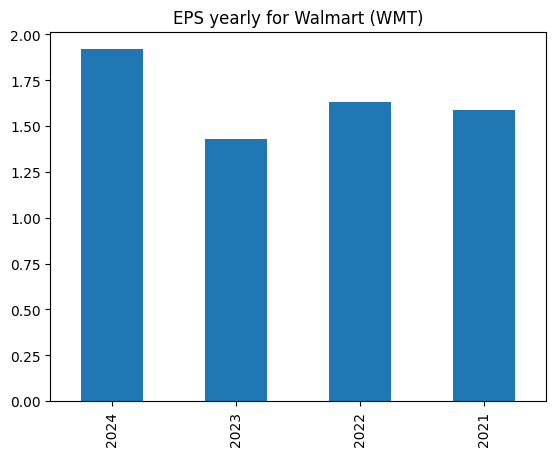

In [223]:
EPS_year = df_fin_ratios['EPS'].index.year

df_fin_ratios['EPS'].plot.bar(title = 'EPS yearly for Walmart (WMT)')

plt.xticks(range(len(EPS_year)), EPS_year)
# Displaying the plot
plt.show()

# 5) [Code snippet 7] Daily OHCLV data for a set of stocks

In [224]:
# https://companiesmarketcap.com/usa/largest-companies-in-the-usa-by-market-cap/
US_STOCKS = ['MSFT', 'AAPL', 'GOOG', 'NVDA', 'AMZN', 'META', 'BRK-B', 'LLY', 'AVGO','V', 'JPM']

# You're required to add EU_STOCKS and INDIA_STOCS
# https://companiesmarketcap.com/european-union/largest-companies-in-the-eu-by-market-cap/
EU_STOCKS = ['NVO','MC.PA', 'ASML', 'RMS.PA', 'OR.PA', 'SAP', 'ACN', 'TTE', 'SIE.DE','IDEXY','CDI.PA']

# https://companiesmarketcap.com/india/largest-companies-in-india-by-market-cap/
INDIA_STOCKS = ['RELIANCE.NS','TCS.NS','HDB','BHARTIARTL.NS','IBN','SBIN.NS','LICI.NS','INFY','ITC.NS','HINDUNILVR.NS','LT.NS']

In [225]:
ALL_TICKERS = US_STOCKS  + EU_STOCKS + INDIA_STOCKS
ALL_TICKERS

['MSFT',
 'AAPL',
 'GOOG',
 'NVDA',
 'AMZN',
 'META',
 'BRK-B',
 'LLY',
 'AVGO',
 'V',
 'JPM',
 'NVO',
 'MC.PA',
 'ASML',
 'RMS.PA',
 'OR.PA',
 'SAP',
 'ACN',
 'TTE',
 'SIE.DE',
 'IDEXY',
 'CDI.PA',
 'RELIANCE.NS',
 'TCS.NS',
 'HDB',
 'BHARTIARTL.NS',
 'IBN',
 'SBIN.NS',
 'LICI.NS',
 'INFY',
 'ITC.NS',
 'HINDUNILVR.NS',
 'LT.NS']

In [276]:
import time

stocks_df = pd.DataFrame({'A' : []})

for i,ticker in enumerate(ALL_TICKERS):
  print(i,ticker)

  # Work with stock prices
  historyPrices = yf.download(tickers = ticker,
                     period = "max",
                     interval = "1d")

  historyPrices.columns = historyPrices.columns.get_level_values(0)  # Сохраняем только второй уровень, чтобы остались чистые названия
  print(historyPrices.tail(1))


  # generate features for historical prices, and what we want to predict
  historyPrices['Ticker'] = ticker
  historyPrices['Year']= historyPrices.index.year
  historyPrices['Month'] = historyPrices.index.month
  historyPrices['Weekday'] = historyPrices.index.weekday
  historyPrices['Date'] = historyPrices.index.date

  # historical returns
  for i in [1,3,7,30,90,365]:
    historyPrices['growth_'+str(i)+'d'] = historyPrices['Adj Close'] / historyPrices['Adj Close'].shift(i)
  historyPrices['growth_future_5d'] = historyPrices['Adj Close'].shift(-5) / historyPrices['Adj Close']

  # Technical indicators
  # SimpleMovingAverage 10 days and 20 days
  historyPrices['SMA10']= historyPrices['Close'].rolling(10).mean()
  historyPrices['SMA20']= historyPrices['Close'].rolling(20).mean()
  historyPrices['growing_moving_average'] = np.where(historyPrices['SMA10'] > historyPrices['SMA20'], 1, 0)
  historyPrices['high_minus_low_relative'] = (historyPrices.High - historyPrices.Low) / historyPrices['Adj Close']

  # 30d rolling volatility : https://ycharts.com/glossary/terms/rolling_vol_30
  historyPrices['volatility'] =   historyPrices['Adj Close'].rolling(30).std() * np.sqrt(252)

  # what we want to predict
  historyPrices['is_positive_growth_5d_future'] = np.where(historyPrices['growth_future_5d'] > 1, 1, 0)

  # sleep 1 sec between downloads - not to overload the API server
  time.sleep(1.5)


  if stocks_df.empty:
    stocks_df = historyPrices
  else:
    stocks_df = pd.concat([stocks_df, historyPrices], ignore_index=True)

0 MSFT


[*********************100%***********************]  1 of 1 completed


Price                       Adj Close       Close        High         Low  \
Date                                                                        
2024-10-23 00:00:00+00:00  424.600006  424.600006  431.079987  422.529999   
2024-10-24 00:00:00+00:00  424.730011  424.730011  425.980011  422.399994   
2024-10-25 00:00:00+00:00  428.149994  428.149994  432.519989  426.570007   
2024-10-28 00:00:00+00:00  426.589996  426.589996  431.940002  426.299988   
2024-10-29 00:00:00+00:00  431.950012  431.950012  433.170013  425.799988   

Price                            Open    Volume  
Date                                             
2024-10-23 00:00:00+00:00  430.859985  19654400  
2024-10-24 00:00:00+00:00  425.329987  13581600  
2024-10-25 00:00:00+00:00  426.760010  16899100  
2024-10-28 00:00:00+00:00  431.660004  14882400  
2024-10-29 00:00:00+00:00  428.000000  17581800  
1 AAPL


[*********************100%***********************]  1 of 1 completed


Price                       Adj Close       Close        High         Low  \
Date                                                                        
2024-10-23 00:00:00+00:00  230.759995  230.759995  235.139999  227.759995   
2024-10-24 00:00:00+00:00  230.570007  230.570007  230.820007  228.410004   
2024-10-25 00:00:00+00:00  231.410004  231.410004  233.220001  229.570007   
2024-10-28 00:00:00+00:00  233.399994  233.399994  234.729996  232.550003   
2024-10-29 00:00:00+00:00  233.669998  233.669998  234.330002  232.320007   

Price                            Open    Volume  
Date                                             
2024-10-23 00:00:00+00:00  234.080002  52287000  
2024-10-24 00:00:00+00:00  229.979996  31109500  
2024-10-25 00:00:00+00:00  229.740005  38802300  
2024-10-28 00:00:00+00:00  233.320007  36087100  
2024-10-29 00:00:00+00:00  233.100006  35332800  
2 GOOG


[*********************100%***********************]  1 of 1 completed


Price                       Adj Close       Close        High         Low  \
Date                                                                        
2024-10-23 00:00:00+00:00  164.479996  164.479996  167.600006  163.632996   
2024-10-24 00:00:00+00:00  164.529999  164.529999  165.050003  162.770004   
2024-10-25 00:00:00+00:00  166.990005  166.990005  167.399994  165.229996   
2024-10-28 00:00:00+00:00  168.339996  168.339996  170.606003  165.789993   
2024-10-29 00:00:00+00:00  171.139999  171.139999  171.860001  168.660004   

Price                            Open    Volume  
Date                                             
2024-10-23 00:00:00+00:00  166.429993  12754300  
2024-10-24 00:00:00+00:00  164.589996  12764400  
2024-10-25 00:00:00+00:00  165.365005  14566400  
2024-10-28 00:00:00+00:00  170.589996  20858300  
2024-10-29 00:00:00+00:00  169.384995  28469700  
3 NVDA


[*********************100%***********************]  1 of 1 completed


Price                       Adj Close       Close        High         Low  \
Date                                                                        
2024-10-23 00:00:00+00:00  139.559998  139.559998  142.429993  137.460007   
2024-10-24 00:00:00+00:00  140.410004  140.410004  141.350006  138.460007   
2024-10-25 00:00:00+00:00  141.539993  141.539993  144.130005  140.800003   
2024-10-28 00:00:00+00:00  140.520004  140.520004  143.139999  140.050003   
2024-10-29 00:00:00+00:00  141.250000  141.250000  142.259995  138.899994   

Price                            Open     Volume  
Date                                              
2024-10-23 00:00:00+00:00  142.029999  285930000  
2024-10-24 00:00:00+00:00  140.820007  172354900  
2024-10-25 00:00:00+00:00  140.929993  205122100  
2024-10-28 00:00:00+00:00  143.000000  173586700  
2024-10-29 00:00:00+00:00  140.289993  156853800  
4 AMZN


[*********************100%***********************]  1 of 1 completed


Price                       Adj Close       Close        High         Low  \
Date                                                                        
2024-10-23 00:00:00+00:00  184.710007  184.710007  189.160004  183.690002   
2024-10-24 00:00:00+00:00  186.380005  186.380005  187.110001  183.860001   
2024-10-25 00:00:00+00:00  187.830002  187.830002  190.449997  187.529999   
2024-10-28 00:00:00+00:00  188.389999  188.389999  190.210007  188.210007   
2024-10-29 00:00:00+00:00  190.830002  190.830002  191.460007  187.820007   

Price                            Open    Volume  
Date                                             
2024-10-23 00:00:00+00:00  188.850006  31937100  
2024-10-24 00:00:00+00:00  185.250000  21647400  
2024-10-25 00:00:00+00:00  187.850006  29362100  
2024-10-28 00:00:00+00:00  189.570007  27930800  
2024-10-29 00:00:00+00:00  188.580002  35534000  


[*********************100%***********************]  1 of 1 completed

5 META
Price                       Adj Close       Close        High         Low  \
Date                                                                        
2024-10-23 00:00:00+00:00  563.690002  563.690002  585.000000  562.500000   
2024-10-24 00:00:00+00:00  567.780029  567.780029  568.880005  561.520020   
2024-10-25 00:00:00+00:00  573.250000  573.250000  581.289978  571.719971   
2024-10-28 00:00:00+00:00  578.159973  578.159973  583.750000  574.119995   
2024-10-29 00:00:00+00:00  593.280029  593.280029  593.669983  575.400024   

Price                            Open    Volume  
Date                                             
2024-10-23 00:00:00+00:00  579.969971  14248400  
2024-10-24 00:00:00+00:00  567.130005   7184700  
2024-10-25 00:00:00+00:00  573.929993  11337900  
2024-10-28 00:00:00+00:00  582.000000  10925100  
2024-10-29 00:00:00+00:00  580.150024  12869300  


6 BRK-B


[*********************100%***********************]  1 of 1 completed


Price                       Adj Close       Close        High         Low  \
Date                                                                        
2024-10-23 00:00:00+00:00  460.609985  460.609985  463.260010  458.750000   
2024-10-24 00:00:00+00:00  457.769989  457.769989  461.049988  453.959991   
2024-10-25 00:00:00+00:00  454.010010  454.010010  459.450012  453.029999   
2024-10-28 00:00:00+00:00  458.489990  458.489990  459.239990  455.000000   
2024-10-29 00:00:00+00:00  454.619995  454.619995  458.920013  454.390015   

Price                            Open   Volume  
Date                                            
2024-10-23 00:00:00+00:00  460.149994  3655200  
2024-10-24 00:00:00+00:00  460.899994  3793500  
2024-10-25 00:00:00+00:00  458.600006  2838900  
2024-10-28 00:00:00+00:00  455.589996  4103400  
2024-10-29 00:00:00+00:00  458.600006  3983000  
7 LLY


[*********************100%***********************]  1 of 1 completed


Price                       Adj Close       Close        High         Low  \
Date                                                                        
2024-10-23 00:00:00+00:00  903.250000  903.250000  907.950012  891.729980   
2024-10-24 00:00:00+00:00  891.320007  891.320007  900.000000  888.280029   
2024-10-25 00:00:00+00:00  892.700012  892.700012  900.960022  889.450012   
2024-10-28 00:00:00+00:00  895.590027  895.590027  898.210022  890.780029   
2024-10-29 00:00:00+00:00  903.580017  903.580017  907.979980  898.210022   

Price                            Open   Volume  
Date                                            
2024-10-23 00:00:00+00:00  905.619995  2646600  
2024-10-24 00:00:00+00:00  898.330017  1797100  
2024-10-25 00:00:00+00:00  899.729980  2228300  
2024-10-28 00:00:00+00:00  894.869995  2084100  
2024-10-29 00:00:00+00:00  898.210022  3162100  


[*********************100%***********************]  1 of 1 completed

8 AVGO


Price                       Adj Close       Close        High         Low  \
Date                                                                        
2024-10-23 00:00:00+00:00  173.509995  173.509995  178.979996  172.570007   
2024-10-24 00:00:00+00:00  171.350006  171.350006  174.300003  169.500000   
2024-10-25 00:00:00+00:00  173.000000  173.000000  176.800003  172.720001   
2024-10-28 00:00:00+00:00  172.020004  172.020004  173.970001  171.350006   
2024-10-29 00:00:00+00:00  179.240005  179.240005  180.229996  171.210007   

Price                            Open    Volume  
Date                                             
2024-10-23 00:00:00+00:00  177.589996  19513700  
2024-10-24 00:00:00+00:00  174.259995  20485200  
2024-10-25 00:00:00+00:00  174.190002  19977700  
2024-10-28 00:00:00+00:00  173.000000  13195800  
2024-10-29 00:00:00+00:00  172.440002  23663800  
9 V


[*********************100%***********************]  1 of 1 completed


Price                       Adj Close       Close        High         Low  \
Date                                                                        
2024-10-23 00:00:00+00:00  283.760010  283.760010  286.059998  283.529999   
2024-10-24 00:00:00+00:00  283.220001  283.220001  283.619995  281.730011   
2024-10-25 00:00:00+00:00  281.730011  281.730011  285.089996  280.779999   
2024-10-28 00:00:00+00:00  284.190002  284.190002  284.640015  281.529999   
2024-10-29 00:00:00+00:00  281.880005  281.880005  285.700012  281.350006   

Price                            Open   Volume  
Date                                            
2024-10-23 00:00:00+00:00  286.040009  5249300  
2024-10-24 00:00:00+00:00  282.390015  4679900  
2024-10-25 00:00:00+00:00  284.000000  4464600  
2024-10-28 00:00:00+00:00  282.040009  4306200  
2024-10-29 00:00:00+00:00  284.269989  7521000  
10 JPM


[*********************100%***********************]  1 of 1 completed


Price                       Adj Close       Close        High         Low  \
Date                                                                        
2024-10-23 00:00:00+00:00  223.410004  223.410004  224.800003  222.529999   
2024-10-24 00:00:00+00:00  224.979996  224.979996  225.059998  221.660004   
2024-10-25 00:00:00+00:00  222.309998  222.309998  225.619995  220.880005   
2024-10-28 00:00:00+00:00  225.500000  225.500000  225.639999  222.949997   
2024-10-29 00:00:00+00:00  222.899994  222.899994  226.750000  222.809998   

Price                            Open   Volume  
Date                                            
2024-10-23 00:00:00+00:00  223.660004  6180500  
2024-10-24 00:00:00+00:00  221.830002  6002200  
2024-10-25 00:00:00+00:00  225.000000  6369700  
2024-10-28 00:00:00+00:00  223.350006  6843000  
2024-10-29 00:00:00+00:00  225.210007  6578800  
11 NVO


[*********************100%***********************]  1 of 1 completed


Price                       Adj Close       Close        High         Low  \
Date                                                                        
2024-10-23 00:00:00+00:00  115.739998  115.739998  116.440002  114.949997   
2024-10-24 00:00:00+00:00  113.919998  113.919998  115.260002  113.910004   
2024-10-25 00:00:00+00:00  113.379997  113.379997  114.190002  113.099998   
2024-10-28 00:00:00+00:00  112.360001  112.360001  112.720001  111.669998   
2024-10-29 00:00:00+00:00  111.980003  111.980003  113.269997  111.150002   

Price                            Open   Volume  
Date                                            
2024-10-23 00:00:00+00:00  116.330002  3220700  
2024-10-24 00:00:00+00:00  115.209999  4499900  
2024-10-25 00:00:00+00:00  113.900002  4594600  
2024-10-28 00:00:00+00:00  112.410004  5356000  
2024-10-29 00:00:00+00:00  111.620003  8232600  
12 MC.PA


[*********************100%***********************]  1 of 1 completed


Price                       Adj Close       Close        High         Low  \
Date                                                                        
2024-10-24 00:00:00+00:00  628.700012  628.700012  635.599976  613.200012   
2024-10-25 00:00:00+00:00  627.000000  627.000000  628.799988  621.500000   
2024-10-28 00:00:00+00:00  632.099976  632.099976  639.500000  628.200012   
2024-10-29 00:00:00+00:00  630.900024  630.900024  644.500000  630.000000   
2024-10-30 00:00:00+00:00  615.000000  615.000000  625.900024  614.099976   

Price                            Open  Volume  
Date                                           
2024-10-24 00:00:00+00:00  613.200012  517019  
2024-10-25 00:00:00+00:00  626.599976  320113  
2024-10-28 00:00:00+00:00  632.400024  339359  
2024-10-29 00:00:00+00:00  631.500000  361684  
2024-10-30 00:00:00+00:00  624.099976  116346  
13 ASML


[*********************100%***********************]  1 of 1 completed


Price                       Adj Close       Close        High         Low  \
Date                                                                        
2024-10-23 00:00:00+00:00  706.965088  708.619995  716.309998  700.099976   
2024-10-24 00:00:00+00:00  709.149963  710.809998  720.000000  706.450012   
2024-10-25 00:00:00+00:00  710.037903  711.700012  723.250000  711.229980   
2024-10-28 00:00:00+00:00  706.994995  708.650024  711.500000  703.989990   
2024-10-29 00:00:00+00:00  715.140015  715.140015  715.940002  703.690002   

Price                            Open   Volume  
Date                                            
2024-10-23 00:00:00+00:00  714.049988  1681400  
2024-10-24 00:00:00+00:00  719.989990  1854700  
2024-10-25 00:00:00+00:00  715.989990  1380100  
2024-10-28 00:00:00+00:00  708.390015  1182800  
2024-10-29 00:00:00+00:00  707.739990  1443600  
14 RMS.PA


[*********************100%***********************]  1 of 1 completed


Price                      Adj Close   Close    High     Low    Open  Volume
Date                                                                        
2024-10-24 00:00:00+00:00     2083.0  2083.0  2132.0  2080.0  2123.0   71823
2024-10-25 00:00:00+00:00     2105.0  2105.0  2111.0  2075.0  2095.0   45849
2024-10-28 00:00:00+00:00     2125.0  2125.0  2162.0  2114.0  2124.0   48457
2024-10-29 00:00:00+00:00     2132.0  2132.0  2164.0  2126.0  2129.0   47644
2024-10-30 00:00:00+00:00     2105.0  2105.0  2125.0  2099.0  2110.0   13222
15 OR.PA


[*********************100%***********************]  1 of 1 completed


Price                       Adj Close       Close        High         Low  \
Date                                                                        
2024-10-24 00:00:00+00:00  358.700012  358.700012  364.000000  357.799988   
2024-10-25 00:00:00+00:00  355.649994  355.649994  358.799988  354.649994   
2024-10-28 00:00:00+00:00  359.549988  359.549988  360.899994  356.649994   
2024-10-29 00:00:00+00:00  355.600006  355.600006  362.399994  354.350006   
2024-10-30 00:00:00+00:00  347.600006  347.600006  351.850006  347.049988   

Price                            Open  Volume  
Date                                           
2024-10-24 00:00:00+00:00  359.750000  360703  
2024-10-25 00:00:00+00:00  358.649994  299447  
2024-10-28 00:00:00+00:00  358.799988  317300  
2024-10-29 00:00:00+00:00  361.450012  307733  
2024-10-30 00:00:00+00:00  350.399994  109769  
16 SAP


[*********************100%***********************]  1 of 1 completed


Price                       Adj Close       Close        High         Low  \
Date                                                                        
2024-10-23 00:00:00+00:00  234.589996  234.589996  236.809998  234.089996   
2024-10-24 00:00:00+00:00  238.300003  238.300003  238.479996  236.320007   
2024-10-25 00:00:00+00:00  237.690002  237.690002  240.080002  237.449997   
2024-10-28 00:00:00+00:00  240.279999  240.279999  240.990005  239.729996   
2024-10-29 00:00:00+00:00  242.309998  242.309998  243.009995  240.000000   

Price                            Open   Volume  
Date                                            
2024-10-23 00:00:00+00:00  235.119995  1099300  
2024-10-24 00:00:00+00:00  237.199997  1369300  
2024-10-25 00:00:00+00:00  238.889999   741500  
2024-10-28 00:00:00+00:00  240.820007   874600  
2024-10-29 00:00:00+00:00  240.500000   801800  
17 ACN


[*********************100%***********************]  1 of 1 completed


Price                       Adj Close       Close        High         Low  \
Date                                                                        
2024-10-23 00:00:00+00:00  370.630005  370.630005  372.480011  368.230011   
2024-10-24 00:00:00+00:00  364.230011  364.230011  373.440002  363.750000   
2024-10-25 00:00:00+00:00  360.799988  360.799988  365.450012  359.589996   
2024-10-28 00:00:00+00:00  361.320007  361.320007  366.989990  360.390015   
2024-10-29 00:00:00+00:00  363.040009  363.040009  365.079987  359.049988   

Price                            Open   Volume  
Date                                            
2024-10-23 00:00:00+00:00  370.839996  2211800  
2024-10-24 00:00:00+00:00  367.500000  2311800  
2024-10-25 00:00:00+00:00  364.000000  2129300  
2024-10-28 00:00:00+00:00  364.000000  2717700  
2024-10-29 00:00:00+00:00  360.910004  2642900  
18 TTE


[*********************100%***********************]  1 of 1 completed


Price                      Adj Close      Close       High        Low  \
Date                                                                    
2024-10-23 00:00:00+00:00  64.599998  64.599998  64.959999  64.260002   
2024-10-24 00:00:00+00:00  64.889999  64.889999  65.269997  64.559998   
2024-10-25 00:00:00+00:00  65.019997  65.019997  65.379997  64.820000   
2024-10-28 00:00:00+00:00  64.699997  64.699997  64.790001  63.860001   
2024-10-29 00:00:00+00:00  64.029999  64.029999  64.809998  63.959999   

Price                           Open   Volume  
Date                                           
2024-10-23 00:00:00+00:00  64.650002   975300  
2024-10-24 00:00:00+00:00  65.139999   563200  
2024-10-25 00:00:00+00:00  65.209999  1375800  
2024-10-28 00:00:00+00:00  63.970001  1326200  
2024-10-29 00:00:00+00:00  64.660004  1660000  
19 SIE.DE


[*********************100%***********************]  1 of 1 completed


Price                       Adj Close       Close        High         Low  \
Date                                                                        
2024-10-24 00:00:00+00:00  179.460007  179.460007  182.100006  179.460007   
2024-10-25 00:00:00+00:00  180.419998  180.419998  181.460007  178.559998   
2024-10-28 00:00:00+00:00  181.839996  181.839996  182.059998  179.059998   
2024-10-29 00:00:00+00:00  181.059998  181.059998  183.039993  180.559998   
2024-10-30 00:00:00+00:00  179.699997  179.699997  180.399994  178.660004   

Price                            Open  Volume  
Date                                           
2024-10-24 00:00:00+00:00  180.440002  933784  
2024-10-25 00:00:00+00:00  179.500000  882137  
2024-10-28 00:00:00+00:00  181.580002  693908  
2024-10-29 00:00:00+00:00  182.199997  657437  
2024-10-30 00:00:00+00:00  179.000000  232120  


[*********************100%***********************]  1 of 1 completed

20 IDEXY
Price                      Adj Close      Close       High        Low  \
Date                                                                    
2024-10-23 00:00:00+00:00  29.309999  29.309999  29.500000  29.240000   
2024-10-24 00:00:00+00:00  29.690001  29.690001  29.860001  29.610001   
2024-10-25 00:00:00+00:00  29.370001  29.370001  29.670000  29.000000   
2024-10-28 00:00:00+00:00  29.600000  29.600000  29.730000  29.180000   
2024-10-29 00:00:00+00:00  29.440001  29.440001  29.600000  29.389999   

Price                           Open   Volume  
Date                                           
2024-10-23 00:00:00+00:00  29.389999   825400  
2024-10-24 00:00:00+00:00  29.660000  1038400  
2024-10-25 00:00:00+00:00  29.000000   232200  
2024-10-28 00:00:00+00:00  29.180000    80400  
2024-10-29 00:00:00+00:00  29.480000   174700  


21 CDI.PA


[*********************100%***********************]  1 of 1 completed


Price                      Adj Close  Close   High    Low   Open  Volume
Date                                                                    
2024-10-24 00:00:00+00:00      588.0  588.0  594.0  573.0  573.0    4467
2024-10-25 00:00:00+00:00      588.0  588.0  588.0  580.5  588.0    7859
2024-10-28 00:00:00+00:00      590.5  590.5  598.5  588.5  595.5    2555
2024-10-29 00:00:00+00:00      588.0  588.0  601.5  588.0  590.0    5235
2024-10-30 00:00:00+00:00      575.0  575.0  582.5  574.5  582.0    1747
22 RELIANCE.NS


[*********************100%***********************]  1 of 1 completed


Price                        Adj Close        Close         High          Low  \
Date                                                                            
2024-10-24 00:00:00+00:00  1339.800049  1339.800049  1343.699951  1323.125000   
2024-10-25 00:00:00+00:00  1327.849976  1327.849976  1344.349976  1322.000000   
2024-10-28 00:00:00+00:00  1334.349976  1334.349976  1353.000000  1322.099976   
2024-10-29 00:00:00+00:00  1340.000000  1340.000000  1343.199951  1320.300049   
2024-10-30 00:00:00+00:00  1343.900024  1343.900024  1350.000000  1325.349976   

Price                             Open    Volume  
Date                                              
2024-10-24 00:00:00+00:00  1335.275024  22155934  
2024-10-25 00:00:00+00:00  1343.500000  18597496  
2024-10-28 00:00:00+00:00  1337.000000  10824350  
2024-10-29 00:00:00+00:00  1328.099976  12008361  
2024-10-30 00:00:00+00:00  1335.000000  11981152  
23 TCS.NS


[*********************100%***********************]  1 of 1 completed


Price                        Adj Close        Close    High          Low  \
Date                                                                       
2024-10-24 00:00:00+00:00  4047.899902  4047.899902  4079.0  4004.000000   
2024-10-25 00:00:00+00:00  4057.550049  4057.550049  4092.0  4032.699951   
2024-10-28 00:00:00+00:00  4090.850098  4090.850098  4134.0  4051.000000   
2024-10-29 00:00:00+00:00  4075.250000  4075.250000  4103.5  4060.100098   
2024-10-30 00:00:00+00:00  4084.649902  4084.649902  4107.0  4060.050049   

Price                             Open   Volume  
Date                                             
2024-10-24 00:00:00+00:00  4004.000000  2676744  
2024-10-25 00:00:00+00:00  4057.050049  1759676  
2024-10-28 00:00:00+00:00  4068.949951  1532534  
2024-10-29 00:00:00+00:00  4095.850098  1445885  
2024-10-30 00:00:00+00:00  4075.000000  1934976  
24 HDB


[*********************100%***********************]  1 of 1 completed


Price                      Adj Close      Close       High        Low  \
Date                                                                    
2024-10-23 00:00:00+00:00  64.169998  64.169998  64.199997  63.130001   
2024-10-24 00:00:00+00:00  64.239998  64.239998  64.440002  64.169998   
2024-10-25 00:00:00+00:00  63.650002  63.650002  64.300003  63.529999   
2024-10-28 00:00:00+00:00  64.500000  64.500000  64.540001  63.720001   
2024-10-29 00:00:00+00:00  64.629997  64.629997  65.059998  64.000000   

Price                           Open   Volume  
Date                                           
2024-10-23 00:00:00+00:00  63.250000  2567800  
2024-10-24 00:00:00+00:00  64.300003  1290000  
2024-10-25 00:00:00+00:00  64.000000  1047800  
2024-10-28 00:00:00+00:00  63.750000  1984800  
2024-10-29 00:00:00+00:00  64.000000  1595700  
25 BHARTIARTL.NS


[*********************100%***********************]  1 of 1 completed


Price                        Adj Close        Close         High          Low  \
Date                                                                            
2024-10-24 00:00:00+00:00  1678.449951  1678.449951  1693.000000  1657.400024   
2024-10-25 00:00:00+00:00  1666.000000  1666.000000  1684.750000  1655.849976   
2024-10-28 00:00:00+00:00  1663.349976  1663.349976  1677.849976  1645.650024   
2024-10-29 00:00:00+00:00  1637.099976  1637.099976  1667.949951  1610.000000   
2024-10-30 00:00:00+00:00  1633.349976  1633.349976  1651.000000  1617.800049   

Price                             Open   Volume  
Date                                             
2024-10-24 00:00:00+00:00  1687.000000  3669575  
2024-10-25 00:00:00+00:00  1681.099976  3434386  
2024-10-28 00:00:00+00:00  1658.150024  2811651  
2024-10-29 00:00:00+00:00  1650.500000  6990747  
2024-10-30 00:00:00+00:00  1627.800049  4622539  
26 IBN


[*********************100%***********************]  1 of 1 completed


Price                      Adj Close  Close       High        Low       Open  \
Date                                                                           
2024-10-23 00:00:00+00:00      29.57  29.57  29.670000  29.420000  29.480000   
2024-10-24 00:00:00+00:00      29.57  29.57  29.690001  29.500000  29.600000   
2024-10-25 00:00:00+00:00      29.48  29.48  29.680000  29.459999  29.540001   
2024-10-28 00:00:00+00:00      31.15  31.15  31.200001  30.570000  30.680000   
2024-10-29 00:00:00+00:00      31.25  31.25  31.600000  31.200001  31.559999   

Price                        Volume  
Date                                 
2024-10-23 00:00:00+00:00   5199200  
2024-10-24 00:00:00+00:00   2899600  
2024-10-25 00:00:00+00:00   3612200  
2024-10-28 00:00:00+00:00  10491100  
2024-10-29 00:00:00+00:00   6047300  
27 SBIN.NS


[*********************100%***********************]  1 of 1 completed


Price                       Adj Close       Close        High         Low  \
Date                                                                        
2024-10-24 00:00:00+00:00  794.549988  794.549988  797.000000  784.650024   
2024-10-25 00:00:00+00:00  780.950012  780.950012  800.750000  772.000000   
2024-10-28 00:00:00+00:00  792.049988  792.049988  803.950012  783.549988   
2024-10-29 00:00:00+00:00  832.700012  832.700012  834.849976  790.500000   
2024-10-30 00:00:00+00:00  822.450012  822.450012  833.000000  821.049988   

Price                            Open    Volume  
Date                                             
2024-10-24 00:00:00+00:00  786.049988   5607500  
2024-10-25 00:00:00+00:00  798.000000   9717125  
2024-10-28 00:00:00+00:00  783.799988  13757251  
2024-10-29 00:00:00+00:00  796.000000  28274791  
2024-10-30 00:00:00+00:00  828.000000  15973735  


[*********************100%***********************]  1 of 1 completed

28 LICI.NS
Price                       Adj Close       Close        High         Low  \
Date                                                                        
2024-10-24 00:00:00+00:00  912.400024  912.400024  924.000000  906.000000   
2024-10-25 00:00:00+00:00  903.650024  903.650024  918.000000  888.299988   
2024-10-28 00:00:00+00:00  915.400024  915.400024  923.650024  896.650024   
2024-10-29 00:00:00+00:00  934.400024  934.400024  937.150024  915.799988   
2024-10-30 00:00:00+00:00  934.950012  934.950012  947.450012  930.049988   

Price                            Open   Volume  
Date                                            
2024-10-24 00:00:00+00:00  906.000000   911588  
2024-10-25 00:00:00+00:00  910.099976  1268810  
2024-10-28 00:00:00+00:00  909.349976  1060660  
2024-10-29 00:00:00+00:00  920.099976  1053721  
2024-10-30 00:00:00+00:00  937.849976   682492  


29 INFY


[*********************100%***********************]  1 of 1 completed


Price                      Adj Close      Close       High        Low  \
Date                                                                    
2024-10-23 00:00:00+00:00  21.958412  22.209999  22.370001  22.110001   
2024-10-24 00:00:00+00:00  21.800224  22.049999  22.320000  22.020000   
2024-10-25 00:00:00+00:00  21.642038  21.889999  22.090000  21.870001   
2024-10-28 00:00:00+00:00  21.820000  22.070000  22.219999  22.049999   
2024-10-29 00:00:00+00:00  21.770000  21.770000  21.969999  21.629999   

Price                           Open   Volume  
Date                                           
2024-10-23 00:00:00+00:00  22.180000  4532000  
2024-10-24 00:00:00+00:00  22.209999  7199600  
2024-10-25 00:00:00+00:00  22.049999  6572800  
2024-10-28 00:00:00+00:00  22.209999  3887200  
2024-10-29 00:00:00+00:00  21.680000  8789300  
30 ITC.NS


[*********************100%***********************]  1 of 1 completed


Price                       Adj Close       Close        High         Low  \
Date                                                                        
2024-10-24 00:00:00+00:00  471.700012  471.700012  482.399994  470.000000   
2024-10-25 00:00:00+00:00  482.299988  482.299988  493.500000  474.200012   
2024-10-28 00:00:00+00:00  484.149994  484.149994  485.899994  476.000000   
2024-10-29 00:00:00+00:00  487.950012  487.950012  489.200012  481.299988   
2024-10-30 00:00:00+00:00  491.549988  491.549988  493.250000  486.500000   

Price                            Open    Volume  
Date                                             
2024-10-24 00:00:00+00:00  482.000000  13092399  
2024-10-25 00:00:00+00:00  475.799988  30961625  
2024-10-28 00:00:00+00:00  481.950012   8614446  
2024-10-29 00:00:00+00:00  485.000000   6866704  
2024-10-30 00:00:00+00:00  487.950012   6392372  
31 HINDUNILVR.NS


[*********************100%***********************]  1 of 1 completed


Price                        Adj Close        Close         High          Low  \
Date                                                                            
2024-10-24 00:00:00+00:00  2505.100098  2505.100098  2647.000000  2452.600098   
2024-10-25 00:00:00+00:00  2528.050049  2528.050049  2540.000000  2500.100098   
2024-10-28 00:00:00+00:00  2575.800049  2575.800049  2589.600098  2520.100098   
2024-10-29 00:00:00+00:00  2547.649902  2547.649902  2585.699951  2536.000000   
2024-10-30 00:00:00+00:00  2554.949951  2554.949951  2563.300049  2533.399902   

Price                             Open   Volume  
Date                                             
2024-10-24 00:00:00+00:00  2647.000000  9216267  
2024-10-25 00:00:00+00:00  2502.300049  2761166  
2024-10-28 00:00:00+00:00  2544.000000   852829  
2024-10-29 00:00:00+00:00  2585.699951  1695654  
2024-10-30 00:00:00+00:00  2557.000000  1200626  
32 LT.NS


[*********************100%***********************]  1 of 1 completed


Price                        Adj Close        Close         High          Low  \
Date                                                                            
2024-10-24 00:00:00+00:00  3442.649902  3442.649902  3474.600098  3416.750000   
2024-10-25 00:00:00+00:00  3326.399902  3326.399902  3435.000000  3315.050049   
2024-10-28 00:00:00+00:00  3340.800049  3340.800049  3373.000000  3262.550049   
2024-10-29 00:00:00+00:00  3380.899902  3380.899902  3384.399902  3316.000000   
2024-10-30 00:00:00+00:00  3408.350098  3408.350098  3438.399902  3353.000000   

Price                             Open   Volume  
Date                                             
2024-10-24 00:00:00+00:00  3444.000000  1924421  
2024-10-25 00:00:00+00:00  3425.000000  3236774  
2024-10-28 00:00:00+00:00  3316.000000  2991674  
2024-10-29 00:00:00+00:00  3316.000000  2253467  
2024-10-30 00:00:00+00:00  3379.949951  1784385  


In [277]:
def get_ticker_type(ticker:str, us_stocks_list, eu_stocks_list, india_stocks_list):
  if ticker in us_stocks_list:
    return 'US'
  elif ticker in eu_stocks_list:
    return 'EU'
  elif ticker in india_stocks_list:
    return 'INDIA'
  else:
    return 'ERROR'


In [278]:
stocks_df['ticker_type'] = stocks_df.Ticker.apply(lambda x:get_ticker_type(x, US_STOCKS, EU_STOCKS, INDIA_STOCKS))

In [279]:
stocks_df

Price,Adj Close,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,...,growth_90d,growth_365d,growth_future_5d,SMA10,SMA20,growing_moving_average,high_minus_low_relative,volatility,is_positive_growth_5d_future,ticker_type
0,0.059946,0.097222,0.101563,0.088542,0.088542,1031788800,MSFT,1986,3,3,...,NaN,NaN,0.982144,NaN,NaN,0,0.217210,NaN,0,US
1,0.062087,0.100694,0.102431,0.097222,0.097222,308160000,MSFT,1986,3,4,...,NaN,NaN,0.922419,NaN,NaN,0,0.083898,NaN,0,US
2,0.063158,0.102431,0.103299,0.100694,0.100694,133171200,MSFT,1986,3,0,...,NaN,NaN,0.881354,NaN,NaN,0,0.041246,NaN,0,US
3,0.061552,0.099826,0.103299,0.098958,0.102431,67766400,MSFT,1986,3,1,...,NaN,NaN,0.921743,NaN,NaN,0,0.070526,NaN,0,US
4,0.060482,0.098090,0.100694,0.097222,0.099826,47894400,MSFT,1986,3,2,...,NaN,NaN,0.964604,NaN,NaN,0,0.057406,NaN,0,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225155,3442.649902,3442.649902,3474.600098,3416.750000,3444.000000,1924421,LT.NS,2024,10,3,...,0.940862,1.489176,NaN,3526.575000,3550.119995,0,0.016804,1824.980253,0,INDIA
225156,3326.399902,3326.399902,3435.000000,3315.050049,3425.000000,3236774,LT.NS,2024,10,4,...,0.908747,1.438523,NaN,3510.959985,3528.332495,0,0.036060,1995.411329,0,INDIA
225157,3340.800049,3340.800049,3373.000000,3262.550049,3316.000000,2991674,LT.NS,2024,10,0,...,0.937913,1.432233,NaN,3489.534985,3510.090002,0,0.033061,2126.898190,0,INDIA
225158,3380.899902,3380.899902,3384.399902,3316.000000,3316.000000,2253467,LT.NS,2024,10,1,...,0.940589,1.456838,NaN,3472.434985,3495.357495,0,0.020231,2195.538452,0,INDIA


In [284]:
stocks_df.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Ticker', 'Year',
       'Month', 'Weekday', 'Date', 'growth_1d', 'growth_3d', 'growth_7d',
       'growth_30d', 'growth_90d', 'growth_365d', 'growth_future_5d', 'SMA10',
       'SMA20', 'growing_moving_average', 'high_minus_low_relative',
       'volatility', 'is_positive_growth_5d_future', 'ticker_type'],
      dtype='object', name='Price')

In [280]:
# count of observations between US-EU-INDIA stocks
stocks_df.ticker_type.value_counts()

,count
ticker_type,
US,82059
EU,78425
INDIA,64676


In [281]:
# unique tickers
stocks_df.Ticker.nunique()

33

In [282]:
# count of observations by stock
stocks_df.Ticker.value_counts()

,count
Ticker,
LLY,13216
JPM,11250
AAPL,11062
NVO,10967
MSFT,9736
CDI.PA,8454
TTE,8314
ASML,7459
SAP,7330


In [283]:
stocks_df.groupby(['Ticker','ticker_type']).Date.agg(['min','max'])

,,min,max
Ticker,ticker_type,,
AAPL,US,1980-12-12,2024-10-29
ACN,EU,2001-07-19,2024-10-29
AMZN,US,1997-05-15,2024-10-29
ASML,EU,1995-03-15,2024-10-29
AVGO,US,2009-08-06,2024-10-29
BHARTIARTL.NS,INDIA,2002-07-01,2024-10-30
BRK-B,US,1996-05-09,2024-10-29
CDI.PA,EU,1992-01-27,2024-10-30
GOOG,US,2004-08-19,2024-10-29


In [285]:
#  average growth 365days
stocks_df[stocks_df.Year>=2020].groupby(by=['Year','ticker_type']).growth_365d.mean()

Year  ticker_type
2020  EU             1.245388
      INDIA          1.103116
      US             1.484070
2021  EU             1.582170
      INDIA          1.547447
      US             1.797571
2022  EU             1.191169
      INDIA          1.380433
      US             1.182379
2023  EU             1.247590
      INDIA          1.202317
      US             1.203253
2024  EU             1.459231
      INDIA          1.356538
      US             2.229632
Name: growth_365d, dtype: float64

In [286]:
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])

In [287]:
# filtering only on stats after 2000
stocks_df[stocks_df.Date>='2000-01-01'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 186693 entries, 3490 to 225159
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Adj Close                     186693 non-null  float64       
 1   Close                         186693 non-null  float64       
 2   High                          186693 non-null  float64       
 3   Low                           186693 non-null  float64       
 4   Open                          186693 non-null  float64       
 5   Volume                        186693 non-null  int64         
 6   Ticker                        186693 non-null  object        
 7   Year                          186693 non-null  int32         
 8   Month                         186693 non-null  int32         
 9   Weekday                       186693 non-null  int32         
 10  Date                          186693 non-null  datetime64[ns]
 11  growth_1d      

In [288]:
stocks_df[stocks_df.Date=='2024-04-01'].tail()

Price,Adj Close,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,...,growth_90d,growth_365d,growth_future_5d,SMA10,SMA20,growing_moving_average,high_minus_low_relative,volatility,is_positive_growth_5d_future,ticker_type
198532,965.351868,970.599976,984.450012,924.000000,925.000000,4863536,LICI.NS,2024,4,0,...,1.599113,1.564274,1.026891,906.085004,953.950003,0,0.062620,1028.645078,1,INDIA
204981,17.035715,17.580000,17.920000,17.500000,17.889999,14601600,INFY,2024,4,0,...,1.003998,1.024508,1.015927,18.156000,18.777500,0,0.024654,13.509024,1,INDIA
212224,419.263611,426.700012,431.350006,425.750000,429.100006,9382308,ITC.NS,2024,4,0,...,0.987044,1.314436,1.005625,422.235004,416.537502,1,0.013357,127.976728,1,INDIA
219467,2263.844238,2285.899902,2295.000000,2262.000000,2270.000000,1427873,HINDUNILVR.NS,2024,4,0,...,0.917590,0.894050,0.992585,2266.539990,2327.240015,0,0.014577,1039.839594,0,INDIA
225015,3808.065186,3838.000000,3851.850098,3780.850098,3780.850098,1905190,LT.NS,2024,4,0,...,1.257886,2.029011,0.992144,3626.594971,3618.109985,1,0.018645,2171.549619,0,INDIA


#6) [Code Snippet 8] Technical Indicators with TA-lib
* PythonInvest article on Tech. Indicators
* Code for generating 100+ tech. indicators/patterns : https://github.com/realmistic/PythonInvest-basic-fin-analysis/blob/master/colab_notebooks/Part14_Exploring_Tech_Indicators_For_Stocks_and_Crypto.ipynb

Indicator groups: https://github.com/TA-Lib/ta-lib-python/blob/master/README.md

* Overlap Studies (17)
* Momentum Indicators (30+)
* Volume Indicators (3)
* Cycle Indicators (5)
* Price Transform (4)
* Volatility Indicators (3)
* Pattern Recognition (60)

In [259]:
# https://stackoverflow.com/questions/49648391/how-to-install-ta-lib-in-google-colab
# Update (apr 2023): Colab is now Python 3.10
# there are some other (older) ways to install talib

url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4079    0  4079    0     0  15289      0 --:--:-- --:--:-- --:--:-- 15334
100  517k  100  517k    0     0   832k      0 --:--:-- --:--:-- --:--:-- 6088k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4071    0  4071    0     0  16791      0 --:--:-- --:--:-- --:--:-- 16822
100  392k  100  392k    0     0   657k      0 --:--:-- --:--:-- --:--:--  657k


## 6.1) Momentum indicators
https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/momentum_indicators.md

In [260]:
def talib_get_momentum_indicators_for_one_ticker(df: pd.DataFrame) -> pd.DataFrame:
  # ADX - Average Directional Movement Index
  talib_momentum_adx = talib.ADX(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # ADXR - Average Directional Movement Index Rating
  talib_momentum_adxr = talib.ADXR(df.High.values, df.Low.values, df.Close.values, timeperiod=14 )
  # APO - Absolute Price Oscillator
  talib_momentum_apo = talib.APO(df.Close.values, fastperiod=12, slowperiod=26, matype=0 )
  # AROON - Aroon
  talib_momentum_aroon = talib.AROON(df.High.values, df.Low.values, timeperiod=14 )
  # talib_momentum_aroon[0].size
  # talib_momentum_aroon[1].size
  # AROONOSC - Aroon Oscillator
  talib_momentum_aroonosc = talib.AROONOSC(df.High.values, df.Low.values, timeperiod=14)
  # BOP - Balance of Power
  # https://school.stockcharts.com/doku.php?id=technical_indicators:balance_of_power
     #calculate open prices as shifted closed prices from the prev day
     # open = df.Last.shift(1)
  talib_momentum_bop = talib.BOP(df.Open.values, df.High.values, df.Low.values, df.Close.values)
  # CCI - Commodity Channel Index
  talib_momentum_cci = talib.CCI(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # CMO - Chande Momentum Oscillator
  talib_momentum_cmo = talib.CMO(df.Close.values, timeperiod=14)
  # DX - Directional Movement Index
  talib_momentum_dx = talib.DX(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # MACD - Moving Average Convergence/Divergence
  talib_momentum_macd, talib_momentum_macdsignal, talib_momentum_macdhist = talib.MACD(df.Close.values, fastperiod=12, \
                                                                                       slowperiod=26, signalperiod=9)
  # MACDEXT - MACD with controllable MA type
  talib_momentum_macd_ext, talib_momentum_macdsignal_ext, talib_momentum_macdhist_ext = talib.MACDEXT(df.Close.values, \
                                                                                                    fastperiod=12, \
                                                                                                    fastmatype=0, \
                                                                                                    slowperiod=26, \
                                                                                                    slowmatype=0, \
                                                                                                    signalperiod=9, \
                                                                                                  signalmatype=0)
  # MACDFIX - Moving Average Convergence/Divergence Fix 12/26
  talib_momentum_macd_fix, talib_momentum_macdsignal_fix, talib_momentum_macdhist_fix = talib.MACDFIX(df.Close.values, \
                                                                                                      signalperiod=9)
  # MFI - Money Flow Index
  talib_momentum_mfi = talib.MFI(df.High.values, df.Low.values, df.Close.values, df.Volume.values, timeperiod=14)
  # MINUS_DI - Minus Directional Indicator
  talib_momentum_minus_di = talib.MINUS_DM(df.High.values, df.Low.values, timeperiod=14)
  # MOM - Momentum
  talib_momentum_mom = talib.MOM(df.Close.values, timeperiod=10)
  # PLUS_DI - Plus Directional Indicator
  talib_momentum_plus_di = talib.PLUS_DI(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # PLUS_DM - Plus Directional Movement
  talib_momentum_plus_dm = talib.PLUS_DM(df.High.values, df.Low.values, timeperiod=14)
  # PPO - Percentage Price Oscillator
  talib_momentum_ppo = talib.PPO(df.Close.values, fastperiod=12, slowperiod=26, matype=0)
  # ROC - Rate of change : ((price/prevPrice)-1)*100
  talib_momentum_roc = talib.ROC(df.Close.values, timeperiod=10)
  # ROCP - Rate of change Percentage: (price-prevPrice)/prevPrice
  talib_momentum_rocp = talib.ROCP(df.Close.values, timeperiod=10)
  # ROCR - Rate of change ratio: (price/prevPrice)
  talib_momentum_rocr = talib.ROCR(df.Close.values, timeperiod=10)
  # ROCR100 - Rate of change ratio 100 scale: (price/prevPrice)*100
  talib_momentum_rocr100 = talib.ROCR100(df.Close.values, timeperiod=10)
  # RSI - Relative Strength Index
  talib_momentum_rsi = talib.RSI(df.Close.values, timeperiod=14)
  # STOCH - Stochastic
  talib_momentum_slowk, talib_momentum_slowd = talib.STOCH(df.High.values, df.Low.values, df.Close.values, \
                                                           fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
  # STOCHF - Stochastic Fast
  talib_momentum_fastk, talib_momentum_fastd = talib.STOCHF(df.High.values, df.Low.values, df.Close.values, \
                                                            fastk_period=5, fastd_period=3, fastd_matype=0)
  # STOCHRSI - Stochastic Relative Strength Index
  talib_momentum_fastk_rsi, talib_momentum_fastd_rsi = talib.STOCHRSI(df.Close.values, timeperiod=14, \
                                                                      fastk_period=5, fastd_period=3, fastd_matype=0)
  # TRIX - 1-day Rate-Of-Change (ROC) of a Triple Smooth EMA
  talib_momentum_trix = talib.TRIX(df.Close.values, timeperiod=30)
  # ULTOSC - Ultimate Oscillator
  talib_momentum_ultosc = talib.ULTOSC(df.High.values, df.Low.values, df.Close.values, timeperiod1=7, timeperiod2=14, timeperiod3=28)
  # WILLR - Williams' %R
  talib_momentum_willr = talib.WILLR(df.High.values, df.Low.values, df.Close.values, timeperiod=14)

  momentum_df =   pd.DataFrame(
    {
      # assume here multi-index <dateTime, ticker>
      # 'datetime': df.index.get_level_values(0),
      # 'ticker': df.index.get_level_values(1) ,

      # old way with separate columns
      'Date': df.Date.values,
      'Ticker': df.Ticker,

      'adx': talib_momentum_adx,
      'adxr': talib_momentum_adxr,
      'apo': talib_momentum_apo,
      'aroon_1': talib_momentum_aroon[0] ,
      'aroon_2': talib_momentum_aroon[1],
      'aroonosc': talib_momentum_aroonosc,
      'bop': talib_momentum_bop,
      'cci': talib_momentum_cci,
      'cmo': talib_momentum_cmo,
      'dx': talib_momentum_dx,
      'macd': talib_momentum_macd,
      'macdsignal': talib_momentum_macdsignal,
      'macdhist': talib_momentum_macdhist,
      'macd_ext': talib_momentum_macd_ext,
      'macdsignal_ext': talib_momentum_macdsignal_ext,
      'macdhist_ext': talib_momentum_macdhist_ext,
      'macd_fix': talib_momentum_macd_fix,
      'macdsignal_fix': talib_momentum_macdsignal_fix,
      'macdhist_fix': talib_momentum_macdhist_fix,
      'mfi': talib_momentum_mfi,
      'minus_di': talib_momentum_minus_di,
      'mom': talib_momentum_mom,
      'plus_di': talib_momentum_plus_di,
      'dm': talib_momentum_plus_dm,
      'ppo': talib_momentum_ppo,
      'roc': talib_momentum_roc,
      'rocp': talib_momentum_rocp,
      'rocr': talib_momentum_rocr,
      'rocr100': talib_momentum_rocr100,
      'rsi': talib_momentum_rsi,
      'slowk': talib_momentum_slowk,
      'slowd': talib_momentum_slowd,
      'fastk': talib_momentum_fastk,
      'fastd': talib_momentum_fastd,
      'fastk_rsi': talib_momentum_fastk_rsi,
      'fastd_rsi': talib_momentum_fastd_rsi,
      'trix': talib_momentum_trix,
      'ultosc': talib_momentum_ultosc,
      'willr': talib_momentum_willr,
     }
  )
  return momentum_df

## 6.2 Volume, Volatility, Cycle, Price indicators
https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/volume_indicators.md

In [261]:
def talib_get_volume_volatility_cycle_price_indicators(df: pd.DataFrame) -> pd.DataFrame:
        # TA-Lib Volume indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/volume_indicators.md
        # AD - Chaikin A/D Line
        talib_ad = talib.AD(
            df.High.values, df.Low.values, df.Close.values, df.Volume.values)
        # ADOSC - Chaikin A/D Oscillator
        talib_adosc = talib.ADOSC(
            df.High.values, df.Low.values, df.Close.values, df.Volume.values, fastperiod=3, slowperiod=10)
        # OBV - On Balance Volume
        talib_obv = talib.OBV(
            df.Close.values, df.Volume.values)

        # TA-Lib Volatility indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/volatility_indicators.md
        # ATR - Average True Range
        talib_atr = talib.ATR(
            df.High.values, df.Low.values, df.Close.values, timeperiod=14)
        # NATR - Normalized Average True Range
        talib_natr = talib.NATR(
            df.High.values, df.Low.values, df.Close.values, timeperiod=14)
        # OBV - On Balance Volume
        talib_obv = talib.OBV(
            df.Close.values, df.Volume.values)

        # TA-Lib Cycle Indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/cycle_indicators.md
        # HT_DCPERIOD - Hilbert Transform - Dominant Cycle Period
        talib_ht_dcperiod = talib.HT_DCPERIOD(df.Close.values)
        # HT_DCPHASE - Hilbert Transform - Dominant Cycle Phase
        talib_ht_dcphase = talib.HT_DCPHASE(df.Close.values)
        # HT_PHASOR - Hilbert Transform - Phasor Components
        talib_ht_phasor_inphase, talib_ht_phasor_quadrature = talib.HT_PHASOR(
            df.Close.values)
        # HT_SINE - Hilbert Transform - SineWave
        talib_ht_sine_sine, talib_ht_sine_leadsine = talib.HT_SINE(
            df.Close.values)
        # HT_TRENDMODE - Hilbert Transform - Trend vs Cycle Mode
        talib_ht_trendmode = talib.HT_TRENDMODE(df.Close.values)

        # TA-Lib Price Transform Functions
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/price_transform.md
        # AVGPRICE - Average Price
        talib_avgprice = talib.AVGPRICE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # MEDPRICE - Median Price
        talib_medprice = talib.MEDPRICE(df.High.values, df.Low.values)
        # TYPPRICE - Typical Price
        talib_typprice = talib.TYPPRICE(
            df.High.values, df.Low.values, df.Close.values)
        # WCLPRICE - Weighted Close Price
        talib_wclprice = talib.WCLPRICE(
            df.High.values, df.Low.values, df.Close.values)

        volume_volatility_cycle_price_df = pd.DataFrame(
            {'Date': df.Date.values,
             'Ticker': df.Ticker,
             # TA-Lib Volume indicators
             'ad': talib_ad,
             'adosc': talib_adosc,
             'obv': talib_obv,
             # TA-Lib Volatility indicators
             'atr': talib_atr,
             'natr': talib_natr,
             'obv': talib_obv,
             # TA-Lib Cycle Indicators
             'ht_dcperiod': talib_ht_dcperiod,
             'ht_dcphase': talib_ht_dcphase,
             'ht_phasor_inphase': talib_ht_phasor_inphase,
             'ht_phasor_quadrature': talib_ht_phasor_quadrature,
             'ht_sine_sine': talib_ht_sine_sine,
             'ht_sine_leadsine': talib_ht_sine_leadsine,
             'ht_trendmod': talib_ht_trendmode,
             # TA-Lib Price Transform Functions
             'avgprice': talib_avgprice,
             'medprice': talib_medprice,
             'typprice': talib_typprice,
             'wclprice': talib_wclprice,
             }
        )

        # Need a proper date type
        volume_volatility_cycle_price_df['Date'] = pd.to_datetime(
            volume_volatility_cycle_price_df['Date'])

        return volume_volatility_cycle_price_df

## 6.3) Pattern indicators
https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/pattern_recognition.md

In [262]:
def talib_get_pattern_recognition_indicators(df: pd.DataFrame) -> pd.DataFrame:
# TA-Lib Pattern Recognition indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/pattern_recognition.md
        # Nice article about candles (pattern recognition) https://medium.com/analytics-vidhya/recognizing-over-50-candlestick-patterns-with-python-4f02a1822cb5

        # CDL2CROWS - Two Crows
        talib_cdl2crows = talib.CDL2CROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3BLACKCROWS - Three Black Crows
        talib_cdl3blackrows = talib.CDL3BLACKCROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3INSIDE - Three Inside Up/Down
        talib_cdl3inside = talib.CDL3INSIDE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3LINESTRIKE - Three-Line Strike
        talib_cdl3linestrike = talib.CDL3LINESTRIKE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3OUTSIDE - Three Outside Up/Down
        talib_cdl3outside = talib.CDL3OUTSIDE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3STARSINSOUTH - Three Stars In The South
        talib_cdl3starsinsouth = talib.CDL3STARSINSOUTH(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3WHITESOLDIERS - Three Advancing White Soldiers
        talib_cdl3whitesoldiers = talib.CDL3WHITESOLDIERS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLABANDONEDBABY - Abandoned Baby
        talib_cdlabandonedbaby = talib.CDLABANDONEDBABY(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLADVANCEBLOCK - Advance Block
        talib_cdladvancedblock = talib.CDLADVANCEBLOCK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLBELTHOLD - Belt-hold
        talib_cdlbelthold = talib.CDLBELTHOLD(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLBREAKAWAY - Breakaway
        talib_cdlbreakaway = talib.CDLBREAKAWAY(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLCLOSINGMARUBOZU - Closing Marubozu
        talib_cdlclosingmarubozu = talib.CDLCLOSINGMARUBOZU(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLCONCEALBABYSWALL - Concealing Baby Swallow
        talib_cdlconcealbabyswall = talib.CDLCONCEALBABYSWALL(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLCOUNTERATTACK - Counterattack
        talib_cdlcounterattack = talib.CDLCOUNTERATTACK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLDARKCLOUDCOVER - Dark Cloud Cover
        talib_cdldarkcloudcover = talib.CDLDARKCLOUDCOVER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLDOJI - Doji
        talib_cdldoji = talib.CDLDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLDOJISTAR - Doji Star
        talib_cdldojistar = talib.CDLDOJISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLDRAGONFLYDOJI - Dragonfly Doji
        talib_cdldragonflydoji = talib.CDLDRAGONFLYDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLENGULFING - Engulfing Pattern
        talib_cdlengulfing = talib.CDLENGULFING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLEVENINGDOJISTAR - Evening Doji Star
        talib_cdleveningdojistar = talib.CDLEVENINGDOJISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLEVENINGSTAR - Evening Star
        talib_cdleveningstar = talib.CDLEVENINGSTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLGAPSIDESIDEWHITE - Up/Down-gap side-by-side white lines
        talib_cdlgapsidesidewhite = talib.CDLGAPSIDESIDEWHITE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLGRAVESTONEDOJI - Gravestone Doji
        talib_cdlgravestonedoji = talib.CDLGRAVESTONEDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHAMMER - Hammer
        talib_cdlhammer = talib.CDLHAMMER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHANGINGMAN - Hanging Man
        talib_cdlhangingman = talib.CDLHANGINGMAN(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHARAMI - Harami Pattern
        talib_cdlharami = talib.CDLHARAMI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHARAMICROSS - Harami Cross Pattern
        talib_cdlharamicross = talib.CDLHARAMICROSS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHIGHWAVE - High-Wave Candle
        talib_cdlhighwave = talib.CDLHIGHWAVE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHIKKAKE - Hikkake Pattern
        talib_cdlhikkake = talib.CDLHIKKAKE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHIKKAKEMOD - Modified Hikkake Pattern
        talib_cdlhikkakemod = talib.CDLHIKKAKEMOD(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLHOMINGPIGEON - Homing Pigeon
        talib_cdlhomingpigeon = talib.CDLHOMINGPIGEON(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLIDENTICAL3CROWS - Identical Three Crows
        talib_cdlidentical3crows = talib.CDLIDENTICAL3CROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLINNECK - In-Neck Pattern
        talib_cdlinneck = talib.CDLINNECK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLINVERTEDHAMMER - Inverted Hammer
        talib_cdlinvertedhammer = talib.CDLINVERTEDHAMMER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLKICKING - Kicking
        talib_cdlkicking = talib.CDLKICKING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLKICKINGBYLENGTH - Kicking - bull/bear determined by the longer marubozu
        talib_cdlkickingbylength = talib.CDLKICKINGBYLENGTH(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLLADDERBOTTOM - Ladder Bottom
        talib_cdlladderbottom = talib.CDLLADDERBOTTOM(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLLONGLEGGEDDOJI - Long Legged Doji
        talib_cdllongleggeddoji = talib.CDLLONGLEGGEDDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLLONGLINE - Long Line Candle
        talib_cdllongline = talib.CDLLONGLINE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLMARUBOZU - Marubozu
        talib_cdlmarubozu = talib.CDLMARUBOZU(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLMATCHINGLOW - Matching Low
        talib_cdlmatchinglow = talib.CDLMATCHINGLOW(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLMATHOLD - Mat Hold
        talib_cdlmathold = talib.CDLMATHOLD(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLMORNINGDOJISTAR - Morning Doji Star
        talib_cdlmorningdojistar = talib.CDLMORNINGDOJISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLMORNINGSTAR - Morning Star
        talib_cdlmorningstar = talib.CDLMORNINGSTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLONNECK - On-Neck Pattern
        talib_cdlonneck = talib.CDLONNECK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLPIERCING - Piercing Pattern
        talib_cdlpiercing = talib.CDLPIERCING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLRICKSHAWMAN - Rickshaw Man
        talib_cdlrickshawman = talib.CDLRICKSHAWMAN(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLRISEFALL3METHODS - Rising/Falling Three Methods
        talib_cdlrisefall3methods = talib.CDLRISEFALL3METHODS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSEPARATINGLINES - Separating Lines
        talib_cdlseparatinglines = talib.CDLSEPARATINGLINES(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSHOOTINGSTAR - Shooting Star
        talib_cdlshootingstar = talib.CDLSHOOTINGSTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSHORTLINE - Short Line Candle
        talib_cdlshortline = talib.CDLSHORTLINE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSPINNINGTOP - Spinning Top
        talib_cdlspinningtop = talib.CDLSPINNINGTOP(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLSTALLEDPATTERN - Stalled Pattern
        talib_cdlstalledpattern = talib.CDLSTALLEDPATTERN(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSTICKSANDWICH - Stick Sandwich
        talib_cdlsticksandwich = talib.CDLSTICKSANDWICH(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTAKURI - Takuri (Dragonfly Doji with very long lower shadow)
        talib_cdltakuru = talib.CDLTAKURI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTASUKIGAP - Tasuki Gap
        talib_cdltasukigap = talib.CDLTASUKIGAP(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTHRUSTING - Thrusting Pattern
        talib_cdlthrusting = talib.CDLTHRUSTING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTRISTAR - Tristar Pattern
        talib_cdltristar = talib.CDLTRISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLUNIQUE3RIVER - Unique 3 River
        talib_cdlunique3river = talib.CDLUNIQUE3RIVER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLUPSIDEGAP2CROWS - Upside Gap Two Crows
        talib_cdlupsidegap2crows = talib.CDLUPSIDEGAP2CROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLXSIDEGAP3METHODS - Upside/Downside Gap Three Methods
        talib_cdlxsidegap3methods = talib.CDLXSIDEGAP3METHODS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        pattern_indicators_df = pd.DataFrame(
            {'Date': df.Date.values,
             'Ticker': df.Ticker,
             # TA-Lib Pattern Recognition indicators
             'cdl2crows': talib_cdl2crows,
             'cdl3blackrows': talib_cdl3blackrows,
             'cdl3inside': talib_cdl3inside,
             'cdl3linestrike': talib_cdl3linestrike,
             'cdl3outside': talib_cdl3outside,
             'cdl3starsinsouth': talib_cdl3starsinsouth,
             'cdl3whitesoldiers': talib_cdl3whitesoldiers,
             'cdlabandonedbaby': talib_cdlabandonedbaby,
             'cdladvancedblock': talib_cdladvancedblock,
             'cdlbelthold': talib_cdlbelthold,
             'cdlbreakaway': talib_cdlbreakaway,
             'cdlclosingmarubozu': talib_cdlclosingmarubozu,
             'cdlconcealbabyswall': talib_cdlconcealbabyswall,
             'cdlcounterattack': talib_cdlcounterattack,
             'cdldarkcloudcover': talib_cdldarkcloudcover,
             'cdldoji': talib_cdldoji,
             'cdldojistar': talib_cdldojistar,
             'cdldragonflydoji': talib_cdldragonflydoji,
             'cdlengulfing': talib_cdlengulfing,
             'cdleveningdojistar': talib_cdleveningdojistar,
             'cdleveningstar': talib_cdleveningstar,
             'cdlgapsidesidewhite': talib_cdlgapsidesidewhite,
             'cdlgravestonedoji': talib_cdlgravestonedoji,
             'cdlhammer': talib_cdlhammer,
             'cdlhangingman': talib_cdlhangingman,
             'cdlharami': talib_cdlharami,
             'cdlharamicross': talib_cdlharamicross,
             'cdlhighwave': talib_cdlhighwave,
             'cdlhikkake': talib_cdlhikkake,
             'cdlhikkakemod': talib_cdlhikkakemod,
             'cdlhomingpigeon': talib_cdlhomingpigeon,
             'cdlidentical3crows': talib_cdlidentical3crows,
             'cdlinneck': talib_cdlinneck,
             'cdlinvertedhammer': talib_cdlinvertedhammer,
             'cdlkicking': talib_cdlkicking,
             'cdlkickingbylength': talib_cdlkickingbylength,
             'cdlladderbottom': talib_cdlladderbottom,
             'cdllongleggeddoji': talib_cdllongleggeddoji,
             'cdllongline': talib_cdllongline,
             'cdlmarubozu': talib_cdlmarubozu,
             'cdlmatchinglow': talib_cdlmatchinglow,
             'cdlmathold': talib_cdlmathold,
             'cdlmorningdojistar': talib_cdlmorningdojistar,
             'cdlmorningstar': talib_cdlmorningstar,
             'cdlonneck': talib_cdlonneck,
             'cdlpiercing': talib_cdlpiercing,
             'cdlrickshawman': talib_cdlrickshawman,
             'cdlrisefall3methods': talib_cdlrisefall3methods,
             'cdlseparatinglines': talib_cdlseparatinglines,
             'cdlshootingstar': talib_cdlshootingstar,
             'cdlshortline': talib_cdlshortline,
             'cdlspinningtop': talib_cdlspinningtop,
             'cdlstalledpattern': talib_cdlstalledpattern,
             'cdlsticksandwich': talib_cdlsticksandwich,
             'cdltakuru': talib_cdltakuru,
             'cdltasukigap': talib_cdltasukigap,
             'cdlthrusting': talib_cdlthrusting,
             'cdltristar': talib_cdltristar,
             'cdlunique3river': talib_cdlunique3river,
             'cdlupsidegap2crows': talib_cdlupsidegap2crows,
             'cdlxsidegap3methods': talib_cdlxsidegap3methods
             }
        )

        # Need a proper date type
        pattern_indicators_df['Date'] = pd.to_datetime(
            pattern_indicators_df['Date'])

        return pattern_indicators_df

## 6.4) Calculate Tech Indicators and Merge to the original dataframe

In [289]:
# Volume needs to be float, not int
stocks_df['Volume'] = stocks_df['Volume']*1.0

In [290]:
# to resolve an error "Exception: input array type is not double"
# https://stackoverflow.com/questions/51712269/how-to-run-ta-lib-on-multiple-columns-of-a-pandas-dataframe
for f in ['Open','High','Low','Close', 'Volume', 'Adj Close']:
  stocks_df.loc[:,f] = stocks_df.loc[:,f].astype('float64')

In [265]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225160 entries, 0 to 225159
Columns: 217 entries, ('Adj Close', 'MSFT') to ('ticker_type', '')
dtypes: datetime64[ns](1), float64(209), int32(3), int64(2), object(2)
memory usage: 370.2+ MB


In [291]:
# stocks_df.columns = stocks_df.columns.get_level_values(0)

stocks_df

Price,Adj Close,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,...,growth_90d,growth_365d,growth_future_5d,SMA10,SMA20,growing_moving_average,high_minus_low_relative,volatility,is_positive_growth_5d_future,ticker_type
0,0.059946,0.097222,0.101563,0.088542,0.088542,1.031789e+09,MSFT,1986,3,3,...,NaN,NaN,0.982144,NaN,NaN,0,0.217210,NaN,0,US
1,0.062087,0.100694,0.102431,0.097222,0.097222,3.081600e+08,MSFT,1986,3,4,...,NaN,NaN,0.922419,NaN,NaN,0,0.083898,NaN,0,US
2,0.063158,0.102431,0.103299,0.100694,0.100694,1.331712e+08,MSFT,1986,3,0,...,NaN,NaN,0.881354,NaN,NaN,0,0.041246,NaN,0,US
3,0.061552,0.099826,0.103299,0.098958,0.102431,6.776640e+07,MSFT,1986,3,1,...,NaN,NaN,0.921743,NaN,NaN,0,0.070526,NaN,0,US
4,0.060482,0.098090,0.100694,0.097222,0.099826,4.789440e+07,MSFT,1986,3,2,...,NaN,NaN,0.964604,NaN,NaN,0,0.057406,NaN,0,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225155,3442.649902,3442.649902,3474.600098,3416.750000,3444.000000,1.924421e+06,LT.NS,2024,10,3,...,0.940862,1.489176,NaN,3526.575000,3550.119995,0,0.016804,1824.980253,0,INDIA
225156,3326.399902,3326.399902,3435.000000,3315.050049,3425.000000,3.236774e+06,LT.NS,2024,10,4,...,0.908747,1.438523,NaN,3510.959985,3528.332495,0,0.036060,1995.411329,0,INDIA
225157,3340.800049,3340.800049,3373.000000,3262.550049,3316.000000,2.991674e+06,LT.NS,2024,10,0,...,0.937913,1.432233,NaN,3489.534985,3510.090002,0,0.033061,2126.898190,0,INDIA
225158,3380.899902,3380.899902,3384.399902,3316.000000,3316.000000,2.253467e+06,LT.NS,2024,10,1,...,0.940589,1.456838,NaN,3472.434985,3495.357495,0,0.020231,2195.538452,0,INDIA


In [292]:
import pandas as pd
# supress warnings
pd.options.mode.chained_assignment = None  # default='warn'

# adding Momentum / Pattern/ Volume features to all tickers - one by one
merged_df_with_tech_ind = pd.DataFrame({'A' : []})

current_ticker_data = None
i=0
for ticker in ALL_TICKERS:
  i+=1
  print(f'{i}/{len(ALL_TICKERS)} Current ticker is {ticker}')
  current_ticker_data = stocks_df[stocks_df.Ticker.isin([ticker])]
  # need to have same 'utc' time on both sides
  # https://stackoverflow.com/questions/73964894/you-are-trying-to-merge-on-datetime64ns-utc-and-datetime64ns-columns-if-yo
  current_ticker_data['Date']= pd.to_datetime(current_ticker_data['Date'], utc=True)
#   print(current_ticker_data)
  # 3 calls to get additional features
  df_current_ticker_momentum_indicators = talib_get_momentum_indicators_for_one_ticker(current_ticker_data)
  df_current_ticker_momentum_indicators["Date"]= pd.to_datetime(df_current_ticker_momentum_indicators['Date'], utc=True)
  # df_current_ticker_momentum_indicators.loc[:,"Date"]= pd.to_datetime(df_current_ticker_momentum_indicators['Date'], utc=True)

  df_current_ticker_volume_indicators = talib_get_volume_volatility_cycle_price_indicators(current_ticker_data)
  df_current_ticker_volume_indicators["Date"]= pd.to_datetime(df_current_ticker_volume_indicators['Date'], utc=True)
  # df_current_ticker_volume_indicators.loc[:,"Date"]= pd.to_datetime(df_current_ticker_volume_indicators['Date'], utc=True)

  df_current_ticker_pattern_indicators = talib_get_pattern_recognition_indicators(current_ticker_data)
  df_current_ticker_pattern_indicators["Date"]= pd.to_datetime(df_current_ticker_pattern_indicators['Date'], utc=True)
  # df_current_ticker_pattern_indicators.loc[:,"Date"]= pd.to_datetime(df_current_ticker_pattern_indicators['Date'], utc=True)

  # merge to one df
  m1 = pd.merge(current_ticker_data, df_current_ticker_momentum_indicators.reset_index(), how = 'left', on = ["Date","Ticker"], validate = "one_to_one")
  m2 = pd.merge(m1, df_current_ticker_volume_indicators.reset_index(), how = 'left', on = ["Date","Ticker"], validate = "one_to_one")
  m3 = pd.merge(m2, df_current_ticker_pattern_indicators.reset_index(), how = 'left', on = ["Date","Ticker"], validate = "one_to_one")

  if merged_df_with_tech_ind.empty:
    merged_df_with_tech_ind = m3
  else:
    merged_df_with_tech_ind = pd.concat([merged_df_with_tech_ind,m3], ignore_index = False)

1/33 Current ticker is MSFT
2/33 Current ticker is AAPL
3/33 Current ticker is GOOG
4/33 Current ticker is NVDA
5/33 Current ticker is AMZN
6/33 Current ticker is META
7/33 Current ticker is BRK-B
8/33 Current ticker is LLY
9/33 Current ticker is AVGO
10/33 Current ticker is V
11/33 Current ticker is JPM
12/33 Current ticker is NVO
13/33 Current ticker is MC.PA
14/33 Current ticker is ASML
15/33 Current ticker is RMS.PA
16/33 Current ticker is OR.PA
17/33 Current ticker is SAP
18/33 Current ticker is ACN
19/33 Current ticker is TTE
20/33 Current ticker is SIE.DE
21/33 Current ticker is IDEXY
22/33 Current ticker is CDI.PA
23/33 Current ticker is RELIANCE.NS
24/33 Current ticker is TCS.NS
25/33 Current ticker is HDB
26/33 Current ticker is BHARTIARTL.NS
27/33 Current ticker is IBN
28/33 Current ticker is SBIN.NS
29/33 Current ticker is LICI.NS
30/33 Current ticker is INFY
31/33 Current ticker is ITC.NS
32/33 Current ticker is HINDUNILVR.NS
33/33 Current ticker is LT.NS


In [293]:
current_ticker_data

Price,Adj Close,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,...,growth_90d,growth_365d,growth_future_5d,SMA10,SMA20,growing_moving_average,high_minus_low_relative,volatility,is_positive_growth_5d_future,ticker_type
219612,30.374666,40.435555,40.724445,40.111111,40.111111,3709080.0,LT.NS,2002,7,0,...,NaN,NaN,1.008793,NaN,NaN,0,0.020192,NaN,1,INDIA
219613,30.448126,40.533333,40.933334,40.444443,40.555553,2500024.0,LT.NS,2002,7,1,...,NaN,NaN,1.001974,NaN,NaN,0,0.016057,NaN,1,INDIA
219614,30.107588,40.080002,40.755554,40.022221,40.688889,1910772.0,LT.NS,2002,7,2,...,NaN,NaN,1.010535,NaN,NaN,0,0.024357,NaN,1,INDIA
219615,29.990738,39.924442,40.377777,39.835556,40.244446,1515924.0,LT.NS,2002,7,3,...,NaN,NaN,1.005789,NaN,NaN,0,0.018080,NaN,1,INDIA
219616,30.064184,40.022221,40.222221,39.799999,39.799999,1038928.0,LT.NS,2002,7,4,...,NaN,NaN,1.008329,NaN,NaN,0,0.014044,NaN,1,INDIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225155,3442.649902,3442.649902,3474.600098,3416.750000,3444.000000,1924421.0,LT.NS,2024,10,3,...,0.940862,1.489176,NaN,3526.575000,3550.119995,0,0.016804,1824.980253,0,INDIA
225156,3326.399902,3326.399902,3435.000000,3315.050049,3425.000000,3236774.0,LT.NS,2024,10,4,...,0.908747,1.438523,NaN,3510.959985,3528.332495,0,0.036060,1995.411329,0,INDIA
225157,3340.800049,3340.800049,3373.000000,3262.550049,3316.000000,2991674.0,LT.NS,2024,10,0,...,0.937913,1.432233,NaN,3489.534985,3510.090002,0,0.033061,2126.898190,0,INDIA
225158,3380.899902,3380.899902,3384.399902,3316.000000,3316.000000,2253467.0,LT.NS,2024,10,1,...,0.940589,1.456838,NaN,3472.434985,3495.357495,0,0.020231,2195.538452,0,INDIA


In [294]:
merged_df_with_tech_ind[merged_df_with_tech_ind.Date=='2024-04-01'].tail()

,Adj Close,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,...,cdlspinningtop,cdlstalledpattern,cdlsticksandwich,cdltakuru,cdltasukigap,cdlthrusting,cdltristar,cdlunique3river,cdlupsidegap2crows,cdlxsidegap3methods
463,965.351868,970.599976,984.450012,924.000000,925.000000,4863536.0,LICI.NS,2024,4,0,...,0,0,0,0,0,0,0,0,0,0
6304,17.035715,17.580000,17.920000,17.500000,17.889999,14601600.0,INFY,2024,4,0,...,0,0,0,0,0,0,0,0,0,0
7095,419.263611,426.700012,431.350006,425.750000,429.100006,9382308.0,ITC.NS,2024,4,0,...,0,0,0,0,0,0,0,0,0,0
7098,2263.844238,2285.899902,2295.000000,2262.000000,2270.000000,1427873.0,HINDUNILVR.NS,2024,4,0,...,0,0,0,0,0,0,0,0,0,0
5403,3808.065186,3838.000000,3851.850098,3780.850098,3780.850098,1905190.0,LT.NS,2024,4,0,...,0,0,0,0,0,0,0,0,0,0


In [295]:
merged_df_with_tech_ind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225160 entries, 0 to 5547
Columns: 144 entries, Adj Close to cdlxsidegap3methods
dtypes: datetime64[ns, UTC](1), float64(71), int32(65), int64(5), object(2)
memory usage: 193.3+ MB


# 7) [Code snippet 9] Merge All Together

In [296]:
merged_df_with_tech_ind.head(1)

,Adj Close,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,...,cdlspinningtop,cdlstalledpattern,cdlsticksandwich,cdltakuru,cdltasukigap,cdlthrusting,cdltristar,cdlunique3river,cdlupsidegap2crows,cdlxsidegap3methods
0,0.059946,0.097222,0.101563,0.088542,0.088542,1.031789e+09,MSFT,1986,3,3,...,0,0,0,0,0,0,0,0,0,0


In [297]:
merged_df_with_tech_ind.shape

(225160, 144)

In [298]:
# make sure it is dateTime with no timezone
merged_df_with_tech_ind['Date'] = pd.to_datetime(merged_df_with_tech_ind['Date']).dt.tz_localize(None)

In [299]:
# merge with dax_daily_to_merge
dax_daily_to_merge.tail(1)

Price,growth_dax_1d,growth_dax_3d,growth_dax_7d,growth_dax_30d,growth_dax_90d,growth_dax_365d
Ticker,,,,,,
Date,,,,,,
2024-10-30 00:00:00+00:00,0.996627,0.997368,0.997491,1.037457,1.069243,1.22022


In [305]:
dax_daily_to_merge.columns = dax_daily_to_merge.columns.get_level_values(0)

In [301]:
merged_df_with_tech_ind.columns = merged_df_with_tech_ind.columns.get_level_values(0)

In [307]:
merged_df_with_tech_ind['Date'] = merged_df_with_tech_ind['Date'].dt.tz_localize(None)
dax_daily_to_merge.index = dax_daily_to_merge.index.tz_localize(None)

In [308]:
m2 = pd.merge(merged_df_with_tech_ind,
              dax_daily_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [309]:
m2.tail(1)

,Adj Close,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,...,cdltristar,cdlunique3river,cdlupsidegap2crows,cdlxsidegap3methods,growth_dax_1d,growth_dax_3d,growth_dax_7d,growth_dax_30d,growth_dax_90d,growth_dax_365d
5547,3408.350098,3408.350098,3438.399902,3353.0,3379.949951,1784385.0,LT.NS,2024,10,2,...,0,0,0,0,0.996627,0.997368,0.997491,1.037457,1.069243,1.22022


In [310]:
# check the same number of records, but columns increased
m2.shape

(225160, 150)

In [311]:
# merge with dax_daily_to_merge
snp500_to_merge.tail(1)

Price,growth_snp500_1d,growth_snp500_3d,growth_snp500_7d,growth_snp500_30d,growth_snp500_90d,growth_snp500_365d
Ticker,,,,,,
Date,,,,,,
2024-10-29 00:00:00+00:00,1.001614,1.003969,0.994586,1.0352,1.067397,1.402559


In [312]:
snp500_to_merge.columns = snp500_to_merge.columns.get_level_values(0)
snp500_to_merge.index = snp500_to_merge.index.tz_localize(None)

m3 = pd.merge(m2,
              snp500_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [313]:
m3.tail(1)

,Adj Close,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,...,growth_dax_7d,growth_dax_30d,growth_dax_90d,growth_dax_365d,growth_snp500_1d,growth_snp500_3d,growth_snp500_7d,growth_snp500_30d,growth_snp500_90d,growth_snp500_365d
5547,3408.350098,3408.350098,3438.399902,3353.0,3379.949951,1784385.0,LT.NS,2024,10,2,...,0.997491,1.037457,1.069243,1.22022,NaN,NaN,NaN,NaN,NaN,NaN


In [314]:
m3.shape

(225160, 156)

In [315]:
dji_daily_to_merge.columns = dji_daily_to_merge.columns.get_level_values(0)
dji_daily_to_merge.index = dji_daily_to_merge.index.tz_localize(None)

m4 = pd.merge(m3,
              dji_daily_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [316]:
m4.shape

(225160, 162)

In [317]:
m4.tail(1)

,Adj Close,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,...,growth_snp500_7d,growth_snp500_30d,growth_snp500_90d,growth_snp500_365d,growth_dji_1d,growth_dji_3d,growth_dji_7d,growth_dji_30d,growth_dji_90d,growth_dji_365d
5547,3408.350098,3408.350098,3438.399902,3353.0,3379.949951,1784385.0,LT.NS,2024,10,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [318]:
epi_etf_daily_to_merge.columns = epi_etf_daily_to_merge.columns.get_level_values(0)
epi_etf_daily_to_merge.index = epi_etf_daily_to_merge.index.tz_localize(None)

m5 = pd.merge(m4,
              epi_etf_daily_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [319]:
m5.shape

(225160, 168)

In [320]:
# define quarter as the first date of qtr
m5['Quarter'] = m5['Date'].dt.to_period('Q').dt.to_timestamp()
m5['Quarter']

,Quarter
0,1986-01-01
1,1986-01-01
2,1986-01-01
3,1986-01-01
4,1986-01-01
...,...
5543,2024-10-01
5544,2024-10-01
5545,2024-10-01
5546,2024-10-01


In [321]:
gdppot_to_merge.tail(1)

,gdppot_us_yoy,gdppot_us_qoq
DATE,,
2024-10-01,0.020854,0.005247


In [322]:
gdppot_to_merge.columns = gdppot_to_merge.columns.get_level_values(0)
gdppot_to_merge.index = gdppot_to_merge.index.tz_localize(None)

m6 = pd.merge(m5,
              gdppot_to_merge,
              how='left',
              left_on='Quarter',
              right_index=True,
              validate = "many_to_one"
              )

In [323]:
m6.tail(2)

,Adj Close,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,...,growth_dji_365d,growth_epi_1d,growth_epi_3d,growth_epi_7d,growth_epi_30d,growth_epi_90d,growth_epi_365d,Quarter,gdppot_us_yoy,gdppot_us_qoq
5546,3380.899902,3380.899902,3384.399902,3316.0,3316.000000,2253467.0,LT.NS,2024,10,1,...,1.263677,1.004019,0.997898,0.974543,0.951875,0.998948,1.442775,2024-10-01,0.020854,0.005247
5547,3408.350098,3408.350098,3438.399902,3353.0,3379.949951,1784385.0,LT.NS,2024,10,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-01,0.020854,0.005247


In [324]:
m6.shape

(225160, 171)

In [325]:
m6['Month'] = m6['Date'].dt.to_period('M').dt.to_timestamp()
m6['Month']

,Month
0,1986-03-01
1,1986-03-01
2,1986-03-01
3,1986-03-01
4,1986-03-01
...,...
5543,2024-10-01
5544,2024-10-01
5545,2024-10-01
5546,2024-10-01


In [326]:
cpilfesl_to_merge.tail(1)

,cpi_core_yoy,cpi_core_mom
DATE,,
2024-09-01,0.032587,0.003124


In [327]:
cpilfesl_to_merge.columns = cpilfesl_to_merge.columns.get_level_values(0)
cpilfesl_to_merge.index = cpilfesl_to_merge.index.tz_localize(None)

m7 = pd.merge(m6,
              cpilfesl_to_merge,
              how='left',
              left_on='Month',
              right_index=True,
              validate = "many_to_one"
              )

In [328]:
# PROBLEM! Last month is not defined
m7.tail(1)

,Adj Close,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,...,growth_epi_3d,growth_epi_7d,growth_epi_30d,growth_epi_90d,growth_epi_365d,Quarter,gdppot_us_yoy,gdppot_us_qoq,cpi_core_yoy,cpi_core_mom
5547,3408.350098,3408.350098,3438.399902,3353.0,3379.949951,1784385.0,LT.NS,2024,2024-10-01,2,...,NaN,NaN,NaN,NaN,NaN,2024-10-01,0.020854,0.005247,NaN,NaN


In [329]:
fields_to_fill = ['cpi_core_yoy',	'cpi_core_mom']
# Fill missing values in selected fields with the last defined value
for field in fields_to_fill:
    m7[field] = m7[field].fillna(method='ffill')


<ipython-input-329-3be947a3bd2b>:4: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [330]:
m7.tail(1)

,Adj Close,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,...,growth_epi_3d,growth_epi_7d,growth_epi_30d,growth_epi_90d,growth_epi_365d,Quarter,gdppot_us_yoy,gdppot_us_qoq,cpi_core_yoy,cpi_core_mom
5547,3408.350098,3408.350098,3438.399902,3353.0,3379.949951,1784385.0,LT.NS,2024,2024-10-01,2,...,NaN,NaN,NaN,NaN,NaN,2024-10-01,0.020854,0.005247,0.032587,0.003124


In [331]:
fedfunds.tail(1)

,FEDFUNDS
DATE,
2024-09-01,5.13


In [332]:
fedfunds.columns = fedfunds.columns.get_level_values(0)
fedfunds.index = fedfunds.index.tz_localize(None)

m8 = pd.merge(m7,
              fedfunds,
              how='left',
              left_on='Month',
              right_index=True,
              validate = "many_to_one"
              )

In [333]:
m8.tail(1)

,Adj Close,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,...,growth_epi_7d,growth_epi_30d,growth_epi_90d,growth_epi_365d,Quarter,gdppot_us_yoy,gdppot_us_qoq,cpi_core_yoy,cpi_core_mom,FEDFUNDS
5547,3408.350098,3408.350098,3438.399902,3353.0,3379.949951,1784385.0,LT.NS,2024,2024-10-01,2,...,NaN,NaN,NaN,NaN,2024-10-01,0.020854,0.005247,0.032587,0.003124,NaN


In [334]:
fields_to_fill = ['FEDFUNDS']
# Fill missing values in selected fields with the last defined value
for field in fields_to_fill:
    m8[field] = m8[field].fillna(method='ffill')


<ipython-input-334-e87a2a0059b2>:4: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [335]:
m8.tail(1)

,Adj Close,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,...,growth_epi_7d,growth_epi_30d,growth_epi_90d,growth_epi_365d,Quarter,gdppot_us_yoy,gdppot_us_qoq,cpi_core_yoy,cpi_core_mom,FEDFUNDS
5547,3408.350098,3408.350098,3438.399902,3353.0,3379.949951,1784385.0,LT.NS,2024,2024-10-01,2,...,NaN,NaN,NaN,NaN,2024-10-01,0.020854,0.005247,0.032587,0.003124,5.13


In [336]:
dgs1.tail(1)

,DGS1
DATE,
2024-10-28,4.28


In [337]:
dgs1.columns = dgs1.columns.get_level_values(0)
dgs1.index = dgs1.index.tz_localize(None)

m9 = pd.merge(m8,
              dgs1,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [338]:
# fix last day later
m9.tail(2)

,Adj Close,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,...,growth_epi_30d,growth_epi_90d,growth_epi_365d,Quarter,gdppot_us_yoy,gdppot_us_qoq,cpi_core_yoy,cpi_core_mom,FEDFUNDS,DGS1
5546,3380.899902,3380.899902,3384.399902,3316.0,3316.000000,2253467.0,LT.NS,2024,2024-10-01,1,...,0.951875,0.998948,1.442775,2024-10-01,0.020854,0.005247,0.032587,0.003124,5.13,NaN
5547,3408.350098,3408.350098,3438.399902,3353.0,3379.949951,1784385.0,LT.NS,2024,2024-10-01,2,...,NaN,NaN,NaN,2024-10-01,0.020854,0.005247,0.032587,0.003124,5.13,NaN


In [339]:
dgs5.columns = dgs5.columns.get_level_values(0)
dgs5.index = dgs5.index.tz_localize(None)

m10 = pd.merge(m9,
              dgs5,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [340]:
# fix last day later
m10.tail(2)

,Adj Close,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,...,growth_epi_90d,growth_epi_365d,Quarter,gdppot_us_yoy,gdppot_us_qoq,cpi_core_yoy,cpi_core_mom,FEDFUNDS,DGS1,DGS5
5546,3380.899902,3380.899902,3384.399902,3316.0,3316.000000,2253467.0,LT.NS,2024,2024-10-01,1,...,0.998948,1.442775,2024-10-01,0.020854,0.005247,0.032587,0.003124,5.13,NaN,NaN
5547,3408.350098,3408.350098,3438.399902,3353.0,3379.949951,1784385.0,LT.NS,2024,2024-10-01,2,...,NaN,NaN,2024-10-01,0.020854,0.005247,0.032587,0.003124,5.13,NaN,NaN


In [341]:
dgs10.columns = dgs10.columns.get_level_values(0)
dgs10.index = dgs10.index.tz_localize(None)

m11 = pd.merge(m10,
              dgs10,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [342]:
m11.tail(2)

,Adj Close,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,...,growth_epi_365d,Quarter,gdppot_us_yoy,gdppot_us_qoq,cpi_core_yoy,cpi_core_mom,FEDFUNDS,DGS1,DGS5,DGS10
5546,3380.899902,3380.899902,3384.399902,3316.0,3316.000000,2253467.0,LT.NS,2024,2024-10-01,1,...,1.442775,2024-10-01,0.020854,0.005247,0.032587,0.003124,5.13,NaN,NaN,NaN
5547,3408.350098,3408.350098,3438.399902,3353.0,3379.949951,1784385.0,LT.NS,2024,2024-10-01,2,...,NaN,2024-10-01,0.020854,0.005247,0.032587,0.003124,5.13,NaN,NaN,NaN


In [343]:
vix_to_merge

,Adj Close
Date,
1990-01-02 00:00:00+00:00,17.240000
1990-01-03 00:00:00+00:00,18.190001
1990-01-04 00:00:00+00:00,19.219999
1990-01-05 00:00:00+00:00,20.110001
1990-01-08 00:00:00+00:00,20.260000
...,...
2024-10-24 00:00:00+00:00,19.080000
2024-10-25 00:00:00+00:00,20.330000
2024-10-28 00:00:00+00:00,19.799999


In [346]:
vix_to_merge.index = vix_to_merge.index.tz_localize(None)

m12 = pd.merge(m11,
              vix_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [347]:
m12.tail(2)

,Adj Close_x,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,...,Quarter,gdppot_us_yoy,gdppot_us_qoq,cpi_core_yoy,cpi_core_mom,FEDFUNDS,DGS1,DGS5,DGS10,Adj Close_y
5546,3380.899902,3380.899902,3384.399902,3316.0,3316.000000,2253467.0,LT.NS,2024,2024-10-01,1,...,2024-10-01,0.020854,0.005247,0.032587,0.003124,5.13,NaN,NaN,NaN,19.34
5547,3408.350098,3408.350098,3438.399902,3353.0,3379.949951,1784385.0,LT.NS,2024,2024-10-01,2,...,2024-10-01,0.020854,0.005247,0.032587,0.003124,5.13,NaN,NaN,NaN,19.40


In [348]:
gold_to_merge.tail(2)

Price
Date
2024-10-29 00:00:00+00:00
2024-10-30 00:00:00+00:00


In [349]:
gold_to_merge.index = gold_to_merge.index.tz_localize(None)

m13 = pd.merge(m12,
              gold_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [350]:
m13.tail(2)

,Adj Close_x,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,...,Quarter,gdppot_us_yoy,gdppot_us_qoq,cpi_core_yoy,cpi_core_mom,FEDFUNDS,DGS1,DGS5,DGS10,Adj Close_y
5546,3380.899902,3380.899902,3384.399902,3316.0,3316.000000,2253467.0,LT.NS,2024,2024-10-01,1,...,2024-10-01,0.020854,0.005247,0.032587,0.003124,5.13,NaN,NaN,NaN,19.34
5547,3408.350098,3408.350098,3438.399902,3353.0,3379.949951,1784385.0,LT.NS,2024,2024-10-01,2,...,2024-10-01,0.020854,0.005247,0.032587,0.003124,5.13,NaN,NaN,NaN,19.40


In [351]:
crude_oil_to_merge.columns = crude_oil_to_merge.columns.get_level_values(0)
crude_oil_to_merge.index = crude_oil_to_merge.index.tz_localize(None)

m14 = pd.merge(m13,
              crude_oil_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [352]:
m14.tail(2)

,Adj Close_x,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,...,DGS1,DGS5,DGS10,Adj Close_y,growth_wti_oil_1d,growth_wti_oil_3d,growth_wti_oil_7d,growth_wti_oil_30d,growth_wti_oil_90d,growth_wti_oil_365d
5546,3380.899902,3380.899902,3384.399902,3316.0,3316.000000,2253467.0,LT.NS,2024,2024-10-01,1,...,NaN,NaN,NaN,19.34,0.997477,0.957544,0.970962,0.944093,0.832528,0.922834
5547,3408.350098,3408.350098,3438.399902,3353.0,3379.949951,1784385.0,LT.NS,2024,2024-10-01,2,...,NaN,NaN,NaN,19.40,1.006993,0.942881,0.959184,0.954449,0.829107,0.941831


In [353]:
brent_oil_to_merge.columns = brent_oil_to_merge.columns.get_level_values(0)
brent_oil_to_merge.index = brent_oil_to_merge.index.tz_localize(None)

m15 = pd.merge(m14,
              brent_oil_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [354]:
m15.tail(2)

,Adj Close_x,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,...,growth_wti_oil_7d,growth_wti_oil_30d,growth_wti_oil_90d,growth_wti_oil_365d,growth_brent_oil_1d,growth_brent_oil_3d,growth_brent_oil_7d,growth_brent_oil_30d,growth_brent_oil_90d,growth_brent_oil_365d
5546,3380.899902,3380.899902,3384.399902,3316.0,3316.000000,2253467.0,LT.NS,2024,2024-10-01,1,...,0.970962,0.944093,0.832528,0.922834,0.995800,0.956171,0.973447,0.964993,0.834350,0.937517
5547,3408.350098,3408.350098,3438.399902,3353.0,3379.949951,1784385.0,LT.NS,2024,2024-10-01,2,...,0.959184,0.954449,0.829107,0.941831,1.001125,0.936226,0.958406,0.966734,0.827811,0.942048


In [355]:
btc_usd_to_merge.columns = btc_usd_to_merge.columns.get_level_values(0)
btc_usd_to_merge.index = btc_usd_to_merge.index.tz_localize(None)

m16 = pd.merge(m15,
              btc_usd_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [356]:
m16.tail(2)

,Adj Close_x,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,...,growth_brent_oil_7d,growth_brent_oil_30d,growth_brent_oil_90d,growth_brent_oil_365d,growth_btc_usd_1d,growth_btc_usd_3d,growth_btc_usd_7d,growth_btc_usd_30d,growth_btc_usd_90d,growth_btc_usd_365d
5546,3380.899902,3380.899902,3384.399902,3316.0,3316.000000,2253467.0,LT.NS,2024,2024-10-01,1,...,0.973447,0.964993,0.834350,0.937517,1.040235,1.085142,1.079557,1.107948,1.125369,2.107696
5547,3408.350098,3408.350098,3438.399902,3353.0,3379.949951,1784385.0,LT.NS,2024,2024-10-01,2,...,0.958406,0.966734,0.827811,0.942048,0.996883,1.067195,1.091245,1.144708,1.109189,2.091100


In [357]:
fields_to_fill = ['gdppot_us_yoy','gdppot_us_qoq','cpi_core_yoy','cpi_core_mom','FEDFUNDS','DGS1','DGS5','DGS10']
# Fill missing values in selected fields with the last defined value
for field in fields_to_fill:
    m16[field] = m16[field].fillna(method='ffill')

<ipython-input-357-4431326ab3e5>:4: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [358]:
m16.tail(2)

,Adj Close_x,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,...,growth_brent_oil_7d,growth_brent_oil_30d,growth_brent_oil_90d,growth_brent_oil_365d,growth_btc_usd_1d,growth_btc_usd_3d,growth_btc_usd_7d,growth_btc_usd_30d,growth_btc_usd_90d,growth_btc_usd_365d
5546,3380.899902,3380.899902,3384.399902,3316.0,3316.000000,2253467.0,LT.NS,2024,2024-10-01,1,...,0.973447,0.964993,0.834350,0.937517,1.040235,1.085142,1.079557,1.107948,1.125369,2.107696
5547,3408.350098,3408.350098,3438.399902,3353.0,3379.949951,1784385.0,LT.NS,2024,2024-10-01,2,...,0.958406,0.966734,0.827811,0.942048,0.996883,1.067195,1.091245,1.144708,1.109189,2.091100


In [359]:
m16.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225160 entries, 0 to 5547
Columns: 196 entries, Adj Close_x to growth_btc_usd_365d
dtypes: datetime64[ns](3), float64(122), int32(64), int64(5), object(2)
memory usage: 283.4+ MB


In [360]:
date = m16.Date.max()
date_str = date.strftime('%Y_%m_%d')
print(date_str)

2024_10_30


In [361]:
m16.to_parquet(f'stocks_df_combined_{date_str}.parquet.brotli',
              compression='brotli')